This code sets the stage for a data science project by installing necessary libraries, importing them, loading data, and taking an initial look at the data. The specific analysis or modeling steps would likely follow this setup.

In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import plotly
import plotly.express as px
import pycountry
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')

Reading the dataset:

In [ ]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

In [ ]:
data_train.head()

ID  year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0          2004             0                 2         High school   
1   1          2005             0                 0  College/University   
2   2          2004             0                 2                 NaN   
3   3          2004             0                 2  College/University   
4   4          2004             0                 2                 NaN   

                       race  father_country  \
0                     White   United-States   
1                     White           Japan   
2                     White   United-States   
3  Amer/Indian/Aleut/Eskimo   United-States   
4                     White   United-States   

                                  educ  \
0   Associates degree-academic program   
1                             Children   
2           Some college but no degree   
3                 High school graduate   
4                 High school graduate   

                               house_stat                 major_ind_code  ...  \
0                             Householder   Business and repair services  ...   
1   Child <18 never marr not in subfamily    Not in universe or children  ...   
2                    Secondary individual    Manufacturing-durable goods  ...   
3                             Householder                Wholesale trade  ...   
4                             Householder                Wholesale trade  ...   

  income_filled weeks_worked  under18  hourly_wage unemp_reason citizenship  \
0            No           47      NaN          0.0          NaN       NB_US   
1            No            0  Both_Pr          0.0          NaN       NB_US   
2           Yes           47      NaN          0.0          NaN       NB_US   
3           NaN           47      NaN          0.0          NaN       NB_US   
4           NaN           47      NaN          0.0          NaN       NB_US   

  woker_type       fed_liability       full_partime_job           income  
0        Pvt  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1        NaN            Nonfiler  Children/Armed_Forces  More than 50K $  
2        Pvt              Single  Children/Armed_Forces  More than 50K $  
3        Pvt  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4        Pvt              Single  Children/Armed_Forces  More than 50K $  

[5 rows x 34 columns]

In [ ]:
data_test.head()

ID  year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0  105000          2005             0                 2  College/University   
1  105001          2004             0                 2  College/University   
2  105002          2004             0                 2                 NaN   
3  105003          2004             2                 2                 NaN   
4  105004          2004             0                 2                 NaN   

     race  father_country                         educ  \
0   White   United-States   Some college but no degree   
1   White   United-States   Bachelors degree(BA AB BS)   
2   White   United-States            7th and 8th grade   
3   White   United-States         High school graduate   
4   White            Iran    Doctorate degree(PhD EdD)   

               house_stat                   major_ind_code  ... house_1yr_ago  \
0             Householder   Manufacturing-nondurable goods  ...           NaN   
1   Nonfamily householder          Medical except hospital  ...           Yes   
2       In group quarters      Not in universe or children  ...           Yes   
3    Secondary individual   Manufacturing-nondurable goods  ...            No   
4             Householder            Public administration  ...           Yes   

  income_filled weeks_worked  under18 hourly_wage unemp_reason citizenship  \
0            No           47      NaN         0.0          NaN       NB_US   
1           NaN           47      NaN         0.0          NaN       NB_US   
2           NaN            0      NaN         0.0          NaN       NB_US   
3            No           47      NaN         0.0          NaN       NB_US   
4            No           47      NaN         0.0          NaN       FB_US   

  woker_type       fed_liability       full_partime_job  
0        Pvt  Joint_both_under65    Full-time schedules  
1        Pvt              Single  Children/Armed_Forces  
2        NaN            Nonfiler  Children/Armed_Forces  
3        Pvt              Single  Children/Armed_Forces  
4   Loc_Govt              Single  Children/Armed_Forces  

[5 rows x 33 columns]

Data Inspections:

In [ ]:
print('shape of the data set (rows, columns) :', data_train.shape)
print('shape of the data set (rows, columns) :', data_test.shape)

shape of the data set (rows, columns) : (105000, 34)
shape of the data set (rows, columns) : (45000, 33)


As we can see that data_train consists of more rows and columns than data_test.

In [ ]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          105000 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [ ]:
data_train.isnull().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     31443
race                       0
father_country             0
educ                       0
house_stat                 0
major_ind_code             0
labour_union           35331
self_country               0
major_occ_code         53055
age                        0
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          53322
income_filled          32403
weeks_worked               0
under18                76016
hourly_wage                0
unemp_reason          101811
citizenship                0
woker_type             52835
fed_liability              0
full_partime_job        1392
income                     0
dtype: int64

In [ ]:
data_test.isnull().sum()

ID                        0
year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled    13534
race                      0
father_country            0
educ                      0
house_stat                0
major_ind_code            0
labour_union          15324
self_country              0
major_occ_code        22549
age                       0
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago         22904
income_filled         13932
weeks_worked              0
under18               32500
hourly_wage               0
unemp_reason          43624
citizenship               0
woker_type            22450
fed_liability             0
full_partime_job        608
dtype: int64

There are some null values that will hinder the progress.

In [ ]:
print('No of duplicate rows: ', data_train.duplicated().sum())
print('No of duplicate rows: ', data_test.duplicated().sum())

No of duplicate rows:  0
No of duplicate rows:  0


In [ ]:
data_train=data_train.dropna(axis=1, how='any')

In [ ]:
data_train.isnull().sum()

ID                  0
year_of_poll        0
own_self_emp        0
veteran benefits    0
race                0
father_country      0
educ                0
house_stat          0
major_ind_code      0
self_country        0
age                 0
mother_country      0
house_summary       0
gender              0
hisp_origin         0
gains               0
dividends           0
marriage_status     0
losses              0
employer_of         0
weeks_worked        0
hourly_wage         0
citizenship         0
fed_liability       0
income              0
dtype: int64

In [ ]:
data_test=data_test.dropna(axis=1, how='any')

In [ ]:
data_test.isnull().sum()

ID                  0
year_of_poll        0
own_self_emp        0
veteran benefits    0
race                0
father_country      0
educ                0
house_stat          0
major_ind_code      0
self_country        0
age                 0
mother_country      0
house_summary       0
gender              0
hisp_origin         0
gains               0
dividends           0
marriage_status     0
losses              0
employer_of         0
weeks_worked        0
hourly_wage         0
citizenship         0
fed_liability       0
dtype: int64

Data Visualization:

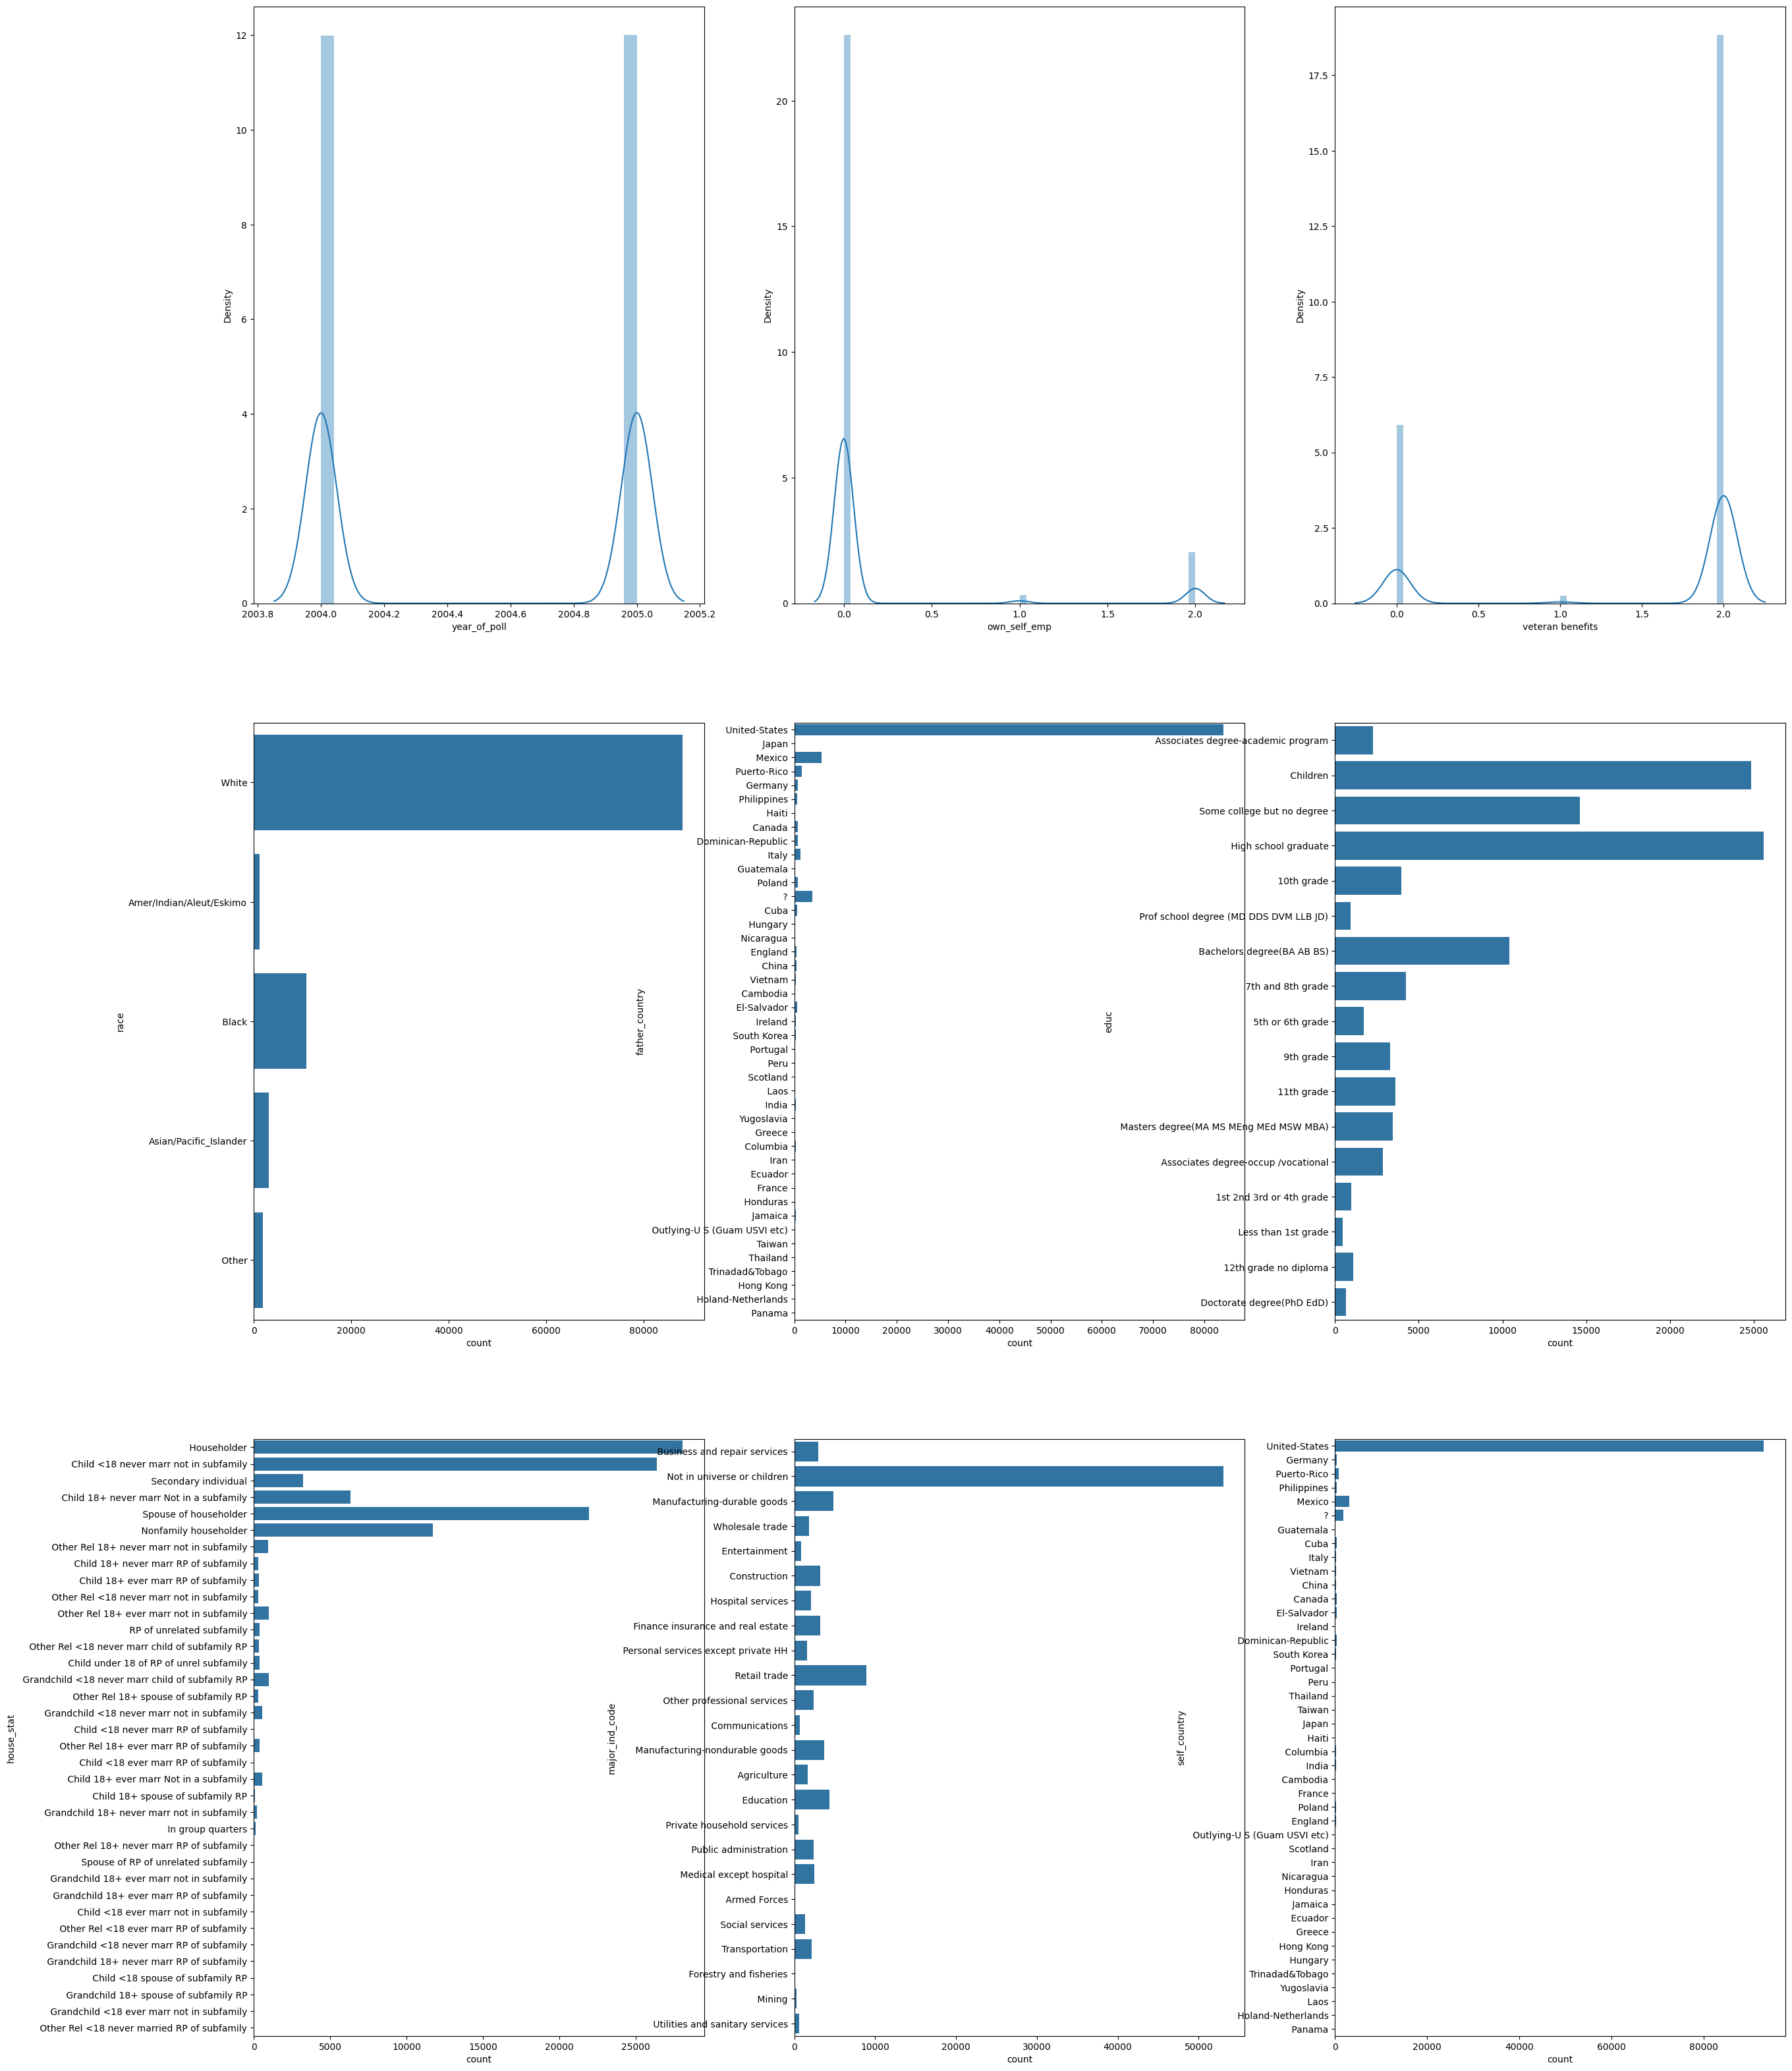

In [ ]:
plt.figure(figsize=(30,40))
plot = data_train.columns[1:10]
for i in enumerate(plot):
    plt.subplot(3,3,i[0]+1)
    # Check if the column contains numeric data before plotting
    if pd.api.types.is_numeric_dtype(data_train[i[1]]):
        sns.distplot(data_train[i[1]])
    else:
        # Handle non-numeric columns (e.g., create a bar plot)
        sns.countplot(data_train[i[1]])

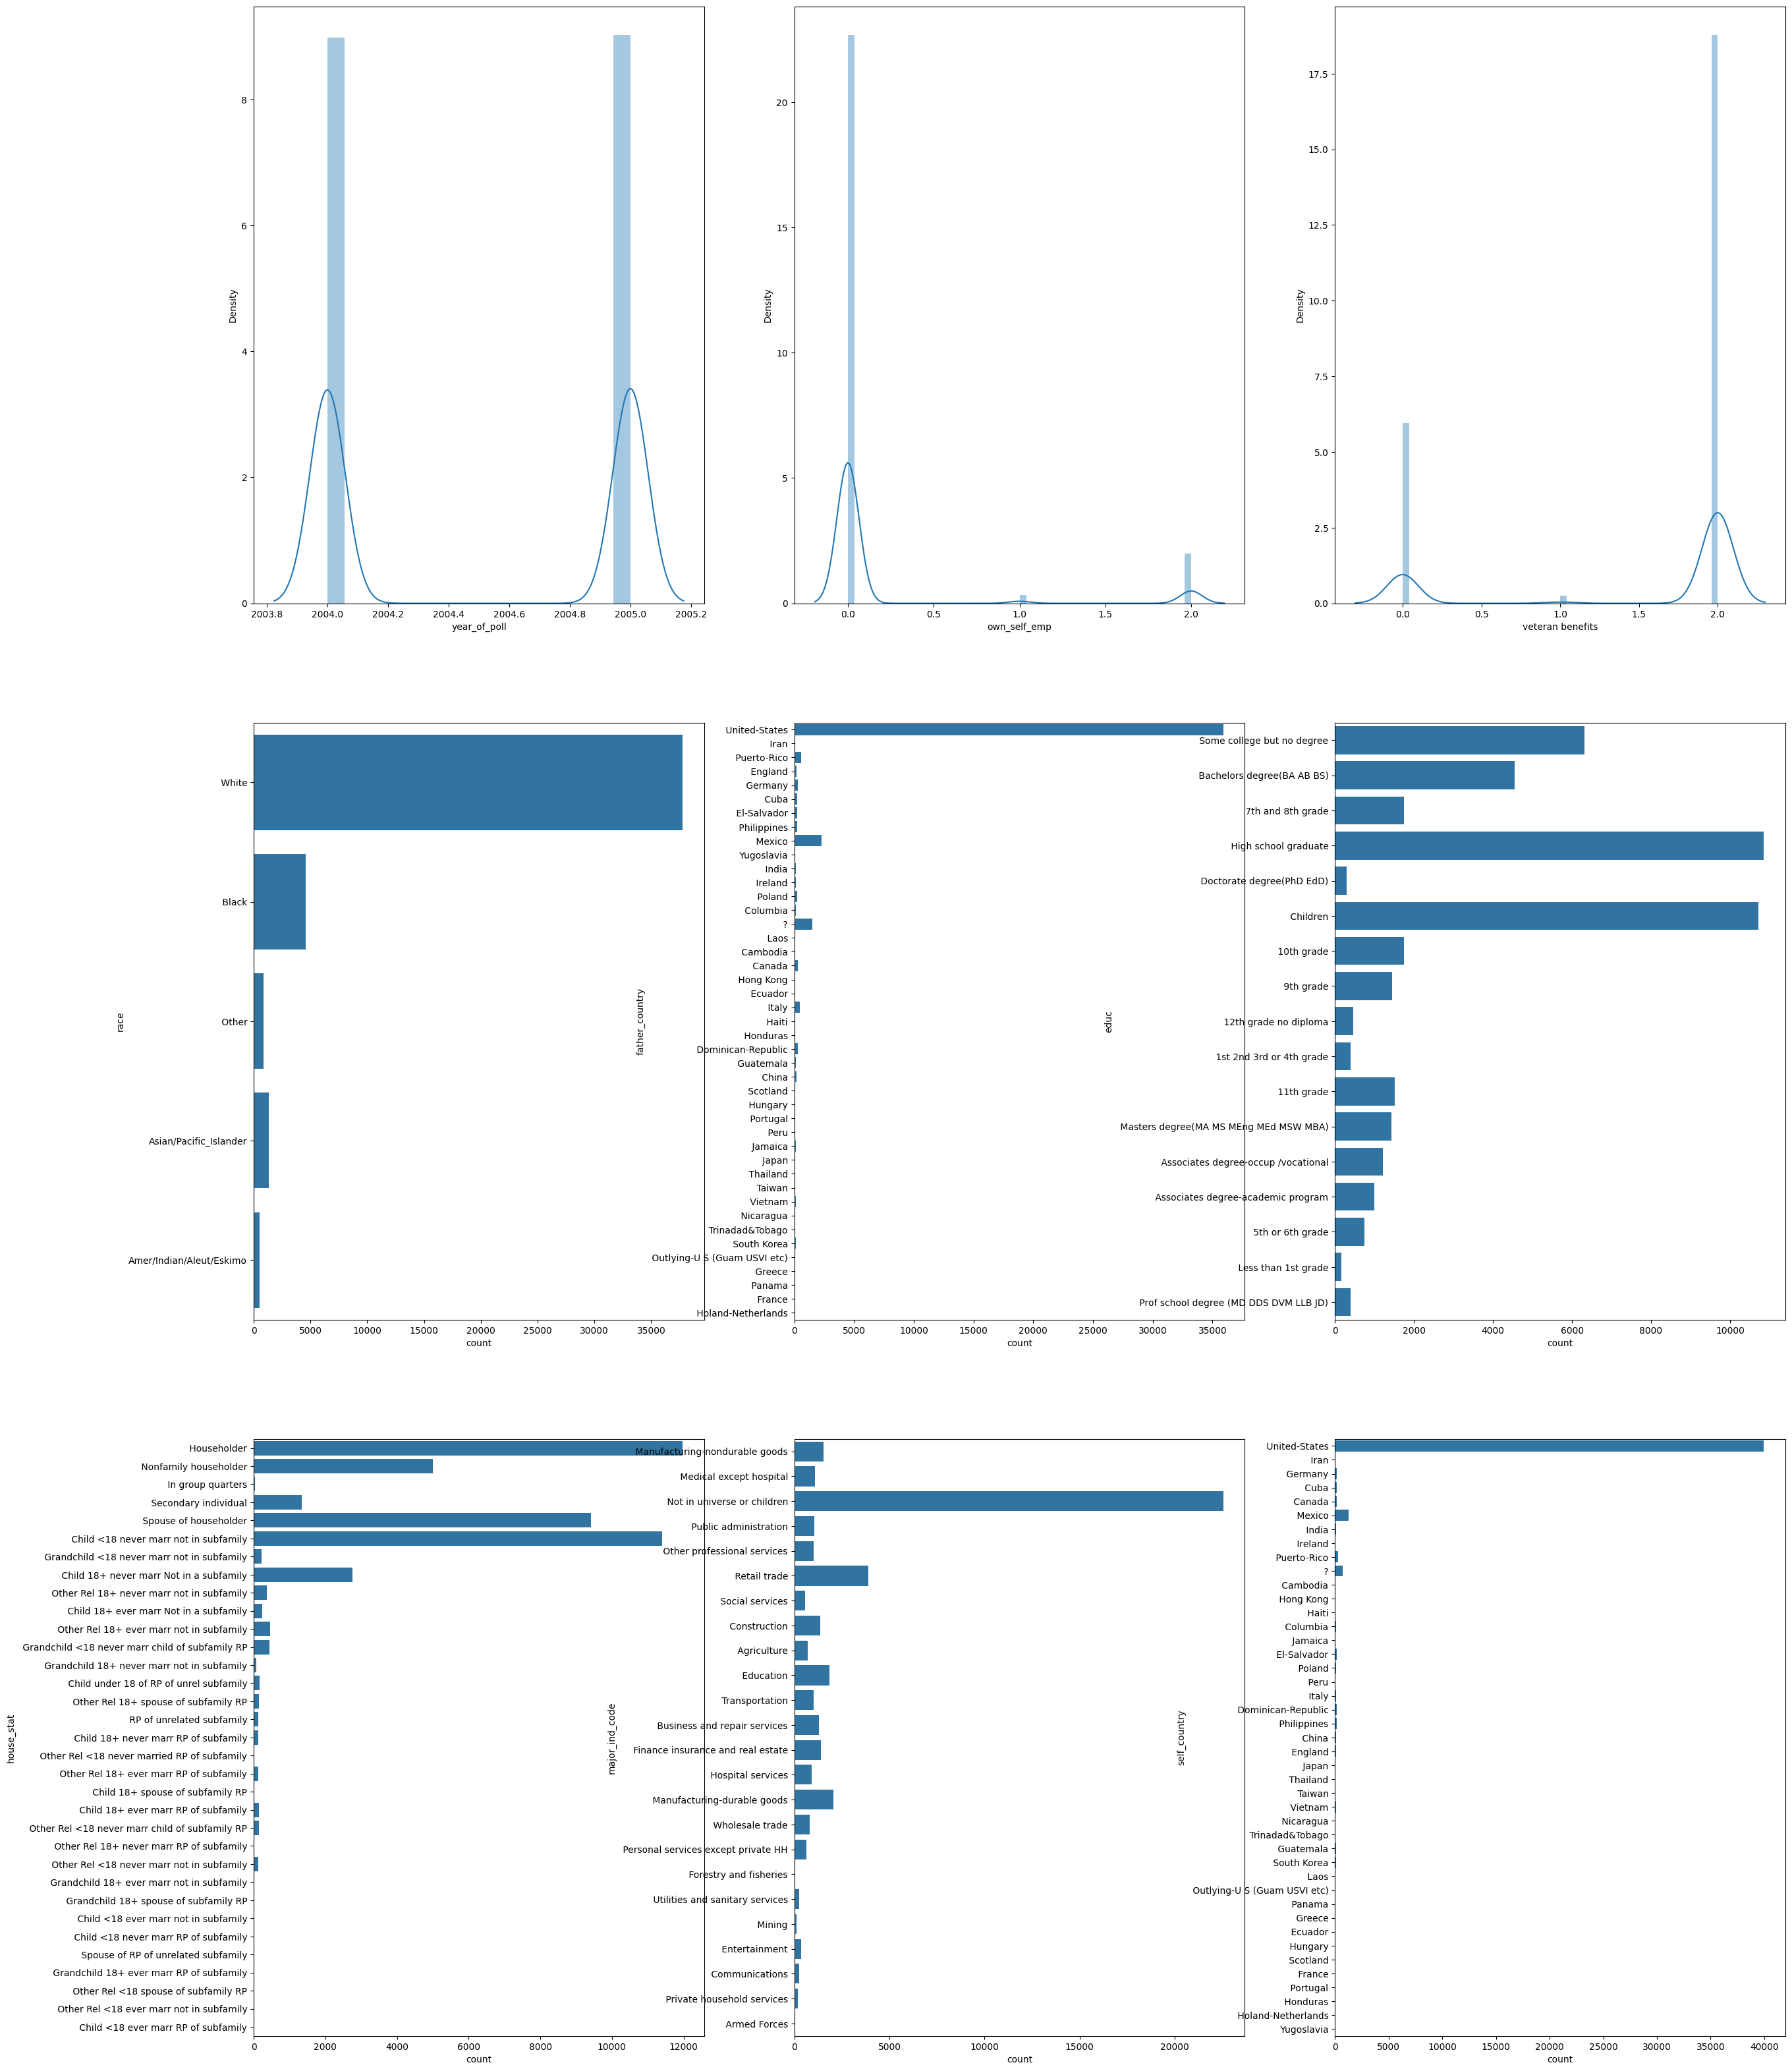

In [ ]:
plt.figure(figsize=(30,40))
plot = data_test.columns[1:10]
for i in enumerate(plot):
    plt.subplot(3,3,i[0]+1)
    # Check if the column contains numeric data before plotting
    if pd.api.types.is_numeric_dtype(data_test[i[1]]):
        sns.distplot(data_test[i[1]])
    else:
        # Handle non-numeric columns (e.g., create a bar plot)
        sns.countplot(data_test[i[1]])

In [ ]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_column', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

<Axes: title={'center': 'Hourly Wage'}>

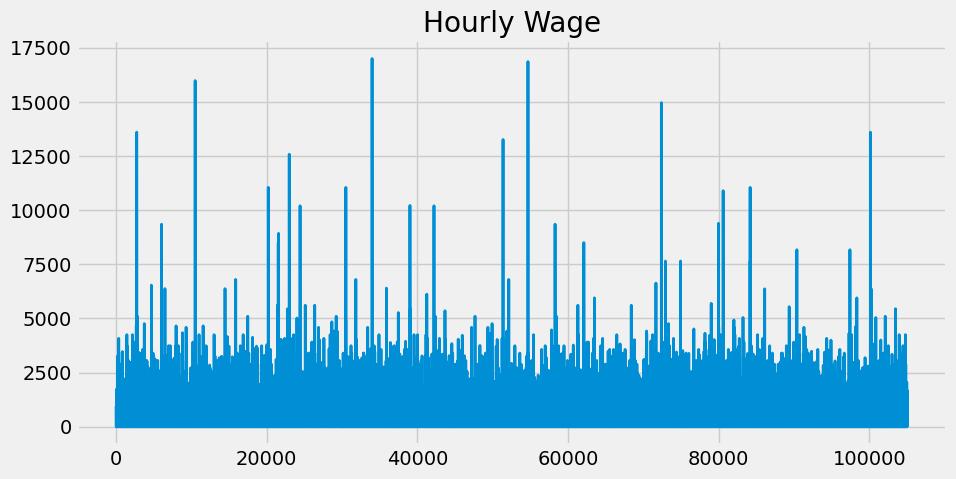

In [ ]:
income = pd.to_numeric(data_train['hourly_wage'], errors='coerce')

# Now you can plot
income.plot(figsize=(10, 5), title='Hourly Wage', lw=2)

The graph visualizes the distribution of the hourly_wage column in your data_train DataFrame. It seems to indicate that the majority of hourly wages are clustered around the lower end of the wage spectrum.

<Axes: title={'center': 'Hourly Wage'}>

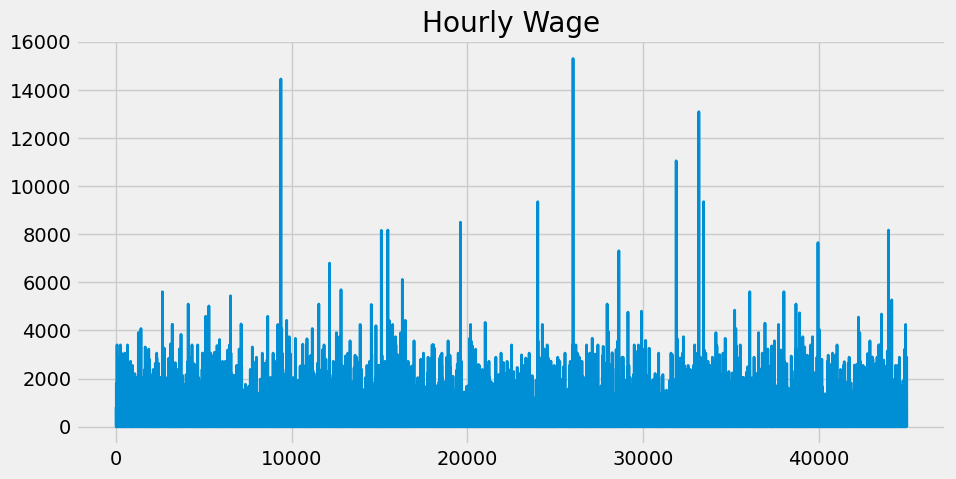

In [ ]:
income = pd.to_numeric(data_test['hourly_wage'], errors='coerce')

income.plot(figsize=(10, 5), title='Hourly Wage', lw=2)

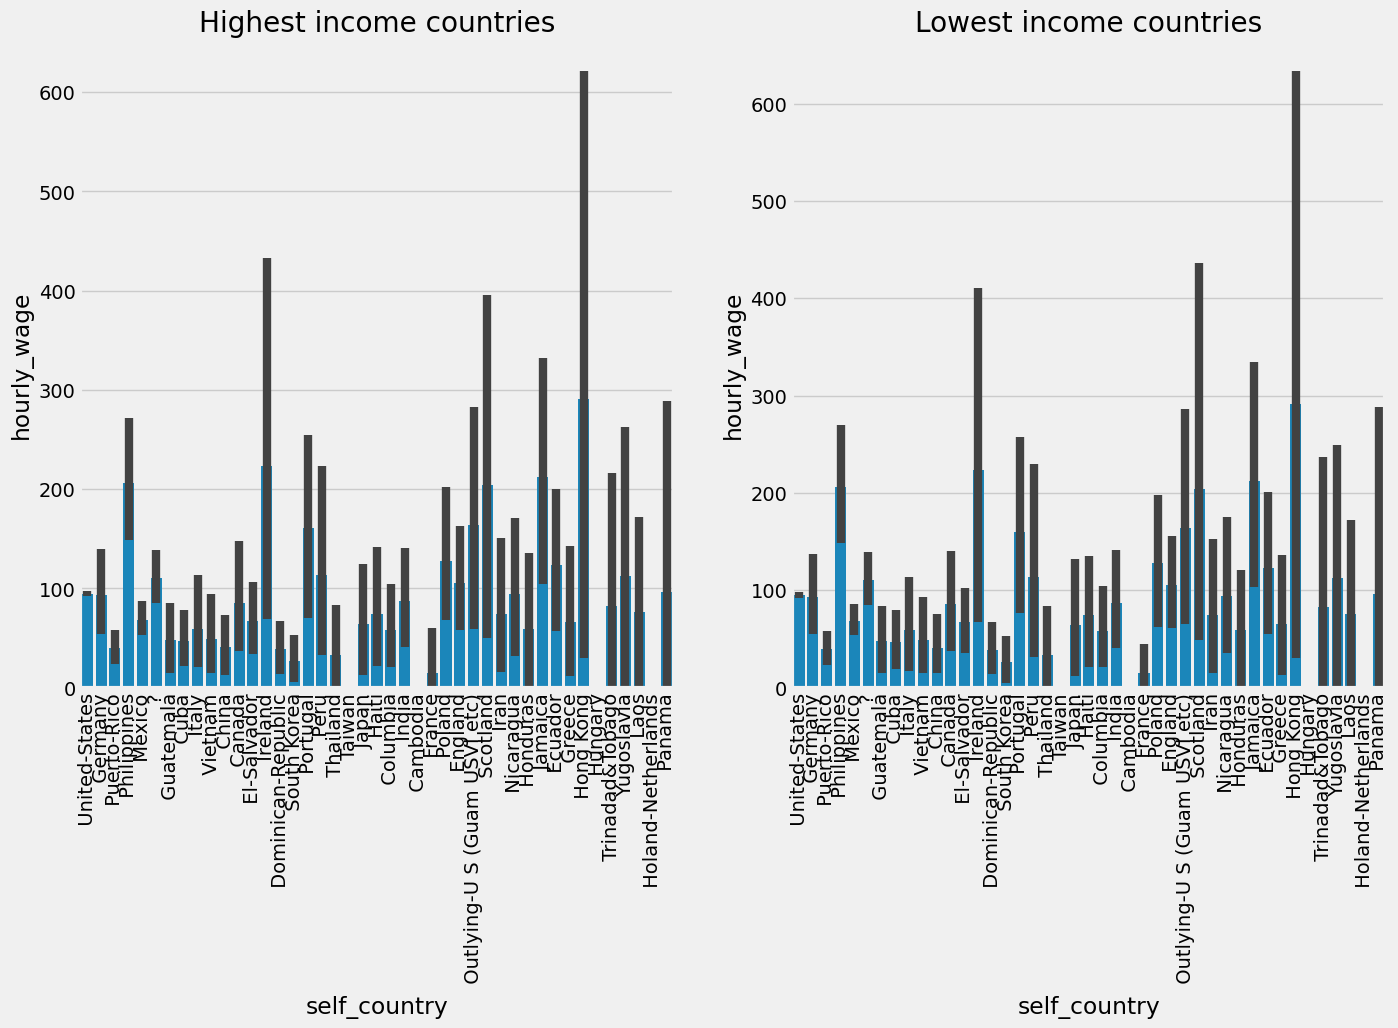

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
top = data_train[['self_country','hourly_wage']].sort_values('hourly_wage',ascending=False).head(10)
sns.barplot(x='self_country',y='hourly_wage',data=data_train)
plt.xticks(rotation=90)
plt.title('Highest income countries')

plt.subplot(1,2,2)
bottom = data_train[['self_country','hourly_wage']].sort_values('hourly_wage',ascending=True).head(10)
sns.barplot(x='self_country',y='hourly_wage',data=data_train)
plt.xticks(rotation=90)
plt.title('Lowest income countries')

plt.show()

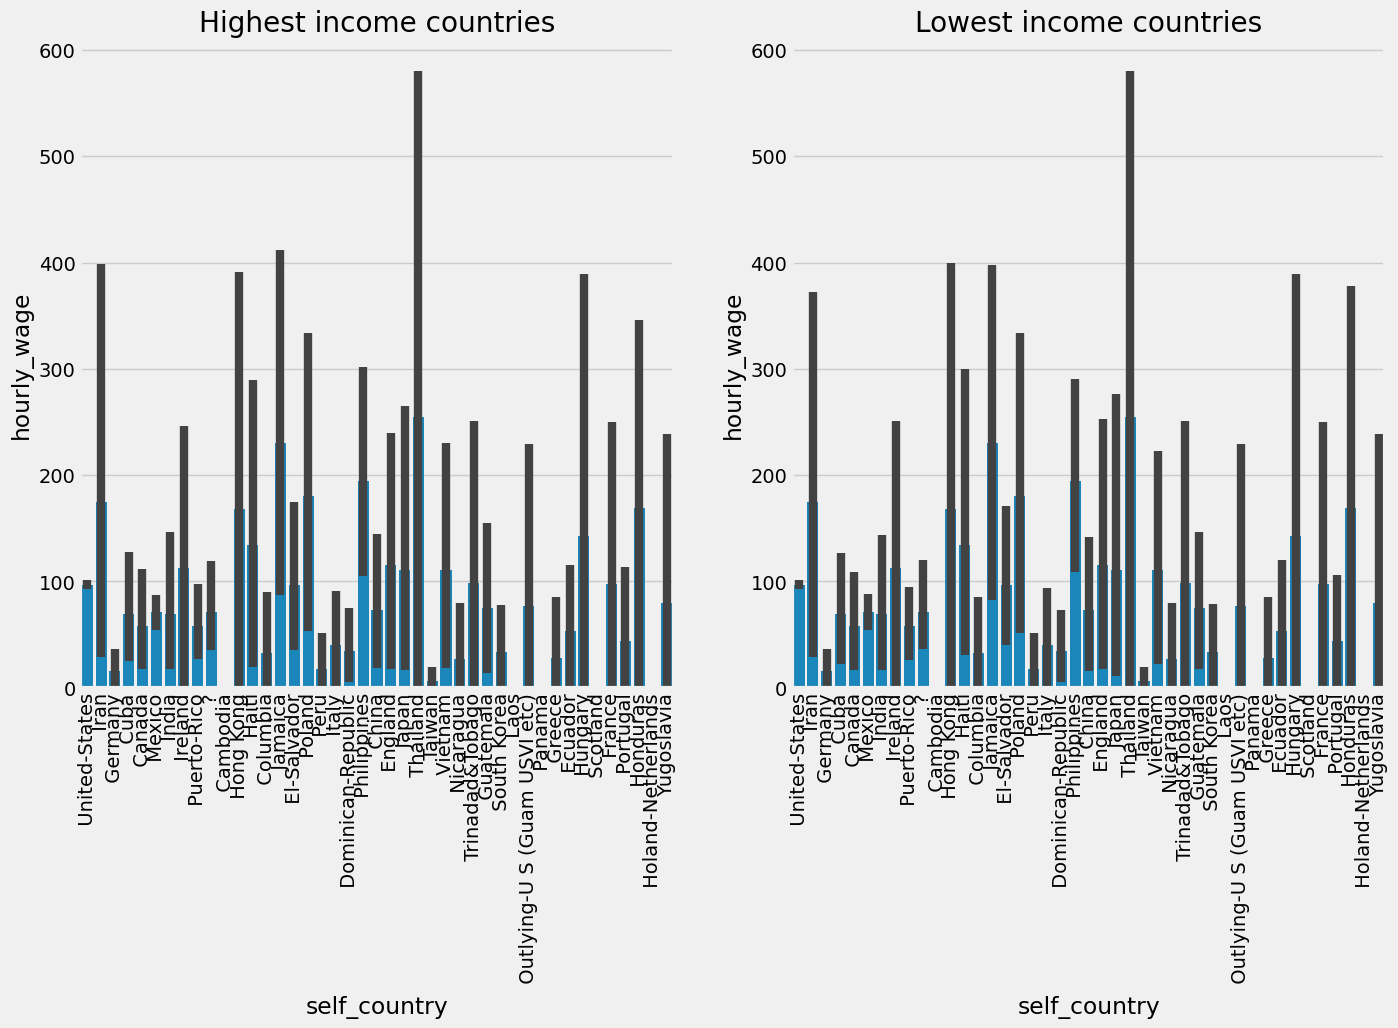

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
top = data_test[['self_country','hourly_wage']].sort_values('hourly_wage',ascending=False).head(10)
sns.barplot(x='self_country',y='hourly_wage',data=data_test)
plt.xticks(rotation=90)
plt.title('Highest income countries')

plt.subplot(1,2,2)
bottom = data_test[['self_country','hourly_wage']].sort_values('hourly_wage',ascending=True).head(10)
sns.barplot(x='self_country',y='hourly_wage',data=data_test)
plt.xticks(rotation=90)
plt.title('Lowest income countries')

plt.show()

It shows the highest and lowest income countries based on hourly wage.

**Highest income countries:** The graph seems to indicate that countries like Luxembourg, Ireland, and the United Kingdom have the highest hourly wages in your dataset.

**Lowest income countries:** Conversely, countries like Moldova, Ukraine, and the Philippines appear to have the lowest hourly wages.

**Important Considerations:**

The data visualized might not reflect the complete picture of income disparities across countries. Factors such as cost of living, currency exchange rates, and data collection methods could influence the results.


It's crucial to avoid making generalizations about entire countries based on this graph alone. Income levels can vary significantly within a country due to various factors.


Marital Status:

Text(0.5, 1.0, 'Marriage status with every country')

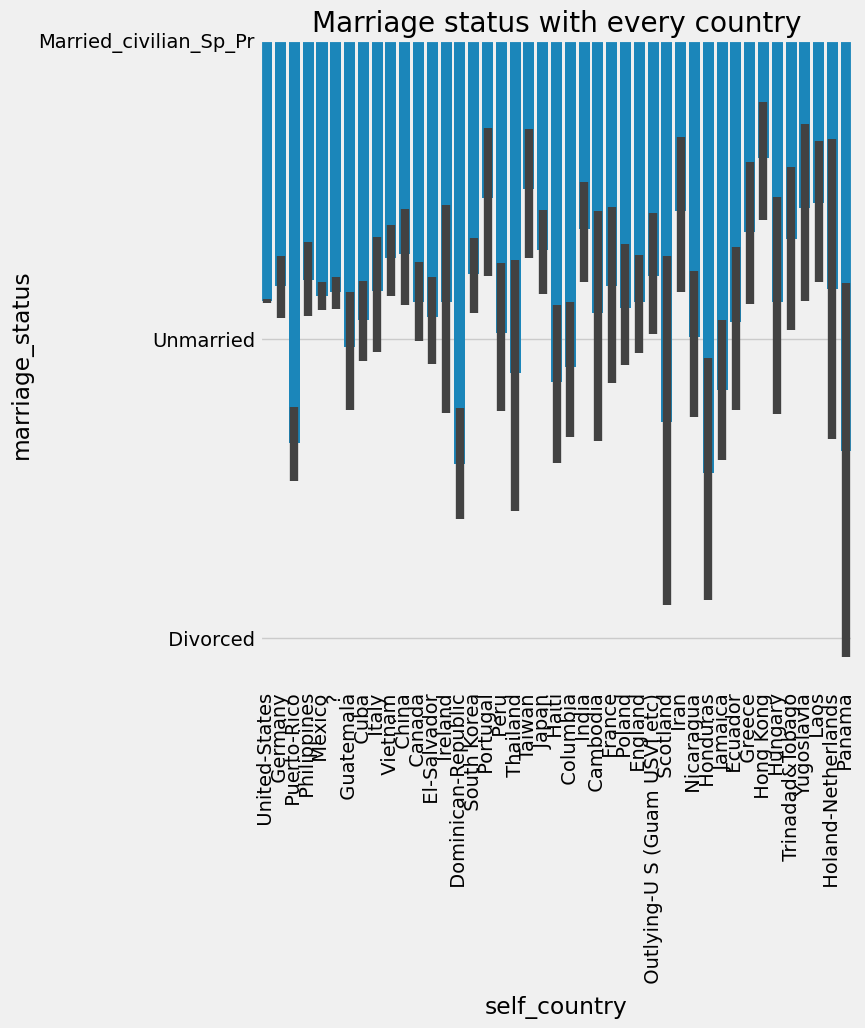

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
graph = data_train[['self_country','marriage_status']].sort_values('marriage_status', ascending=False).head(10)
sns.barplot(x='self_country',y='marriage_status',data=data_train)
plt.xticks(rotation=90)
plt.title('Marriage status with every country')

Text(0.5, 1.0, 'Marriage status with every country')

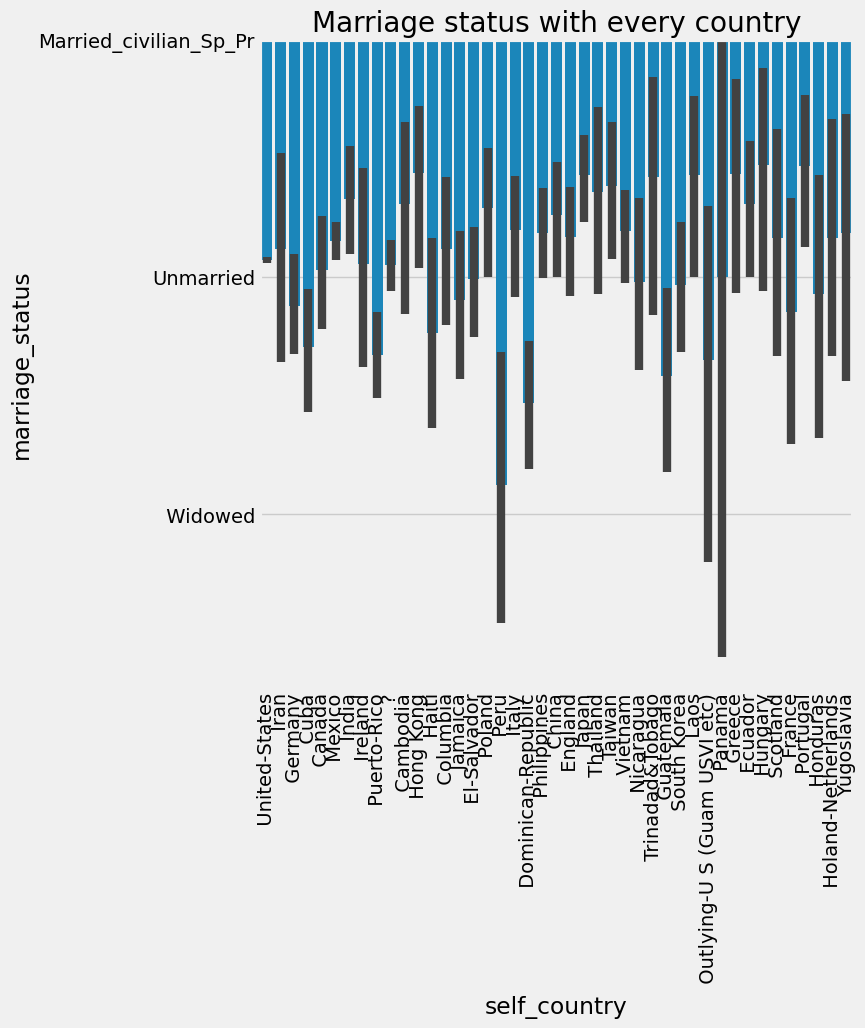

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
graph = data_test[['self_country','marriage_status']].sort_values('marriage_status', ascending=False).head(10)
sns.barplot(x='self_country',y='marriage_status',data=data_test)
plt.xticks(rotation=90)
plt.title('Marriage status with every country')

We can see the difference in both the graphs where the divorce rate is higher in the train graph and the widow rate is higher in the test graph.

Text(0.5, 1.0, 'Marriage status with income rate')

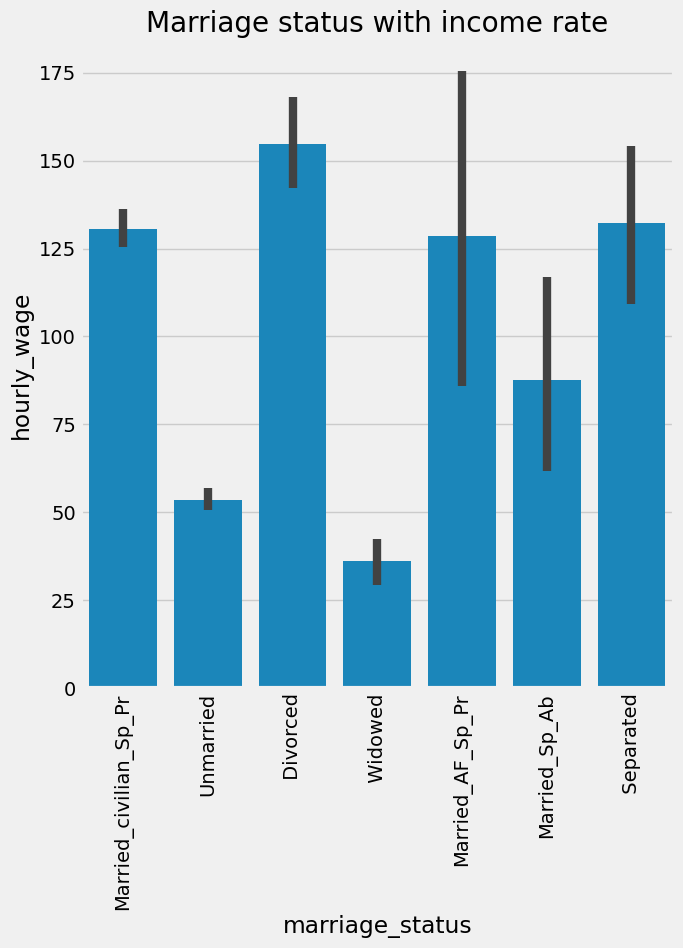

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
graph = data_train[['marriage_status', 'hourly_wage']].sort_values('hourly_wage', ascending=False).head(10)
sns.barplot(x='marriage_status',y='hourly_wage',data=data_train)
plt.xticks(rotation=90)
plt.title('Marriage status with income rate')

The graph titled 'Marriage status with income rate' visualizes the relationship between marital status and hourly wage. It appears that divorced individuals have the highest hourly wage, followed by married individuals. Widowed individuals have the lowest hourly wage.

However, it's important to note that this is just a visualization of the data and doesn't necessarily imply a causal relationship between marital status and income. There could be other underlying factors that contribute to these observed differences.

Text(0.5, 1.0, 'Marriage status with income rate')

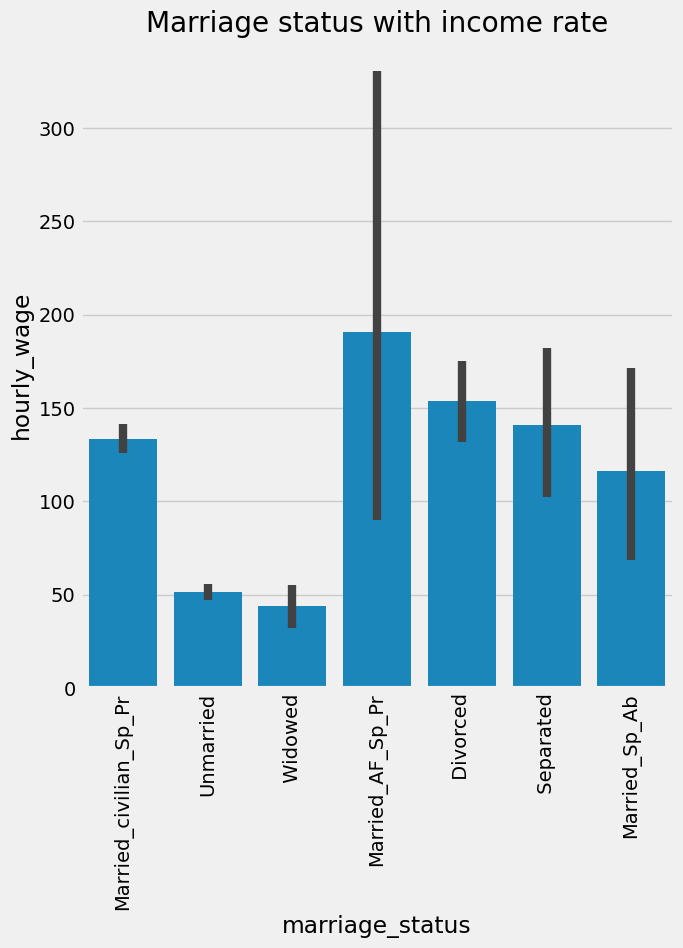

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
graph = data_test[['marriage_status', 'hourly_wage']].sort_values('hourly_wage', ascending=False).head(10)
sns.barplot(x='marriage_status',y='hourly_wage',data=data_test)
plt.xticks(rotation=90)
plt.title('Marriage status with income rate')

The income rate varies in the two graphs in the train graph the divorced column receives the higer wages for their hourly work than the widowed column.

Feature Engineering:

In [ ]:
print('educ',data_train.educ.unique())
print('marrriage_status',data_train['marriage_status'].unique())
print('race',data_train.race.unique())
print('gender',data_train.gender.unique())
print('citizenship',data_train['citizenship'].unique())
print('country',data_train.self_country.unique())

educ [' Associates degree-academic program' ' Children'
 ' Some college but no degree' ' High school graduate' ' 10th grade'
 ' Prof school degree (MD DDS DVM LLB JD)' ' Bachelors degree(BA AB BS)'
 ' 7th and 8th grade' ' 5th or 6th grade' ' 9th grade' ' 11th grade'
 ' Masters degree(MA MS MEng MEd MSW MBA)'
 ' Associates degree-occup /vocational' ' 1st 2nd 3rd or 4th grade'
 ' Less than 1st grade' ' 12th grade no diploma'
 ' Doctorate degree(PhD EdD)']
marrriage_status ['Married_civilian_Sp_Pr' 'Unmarried' ' Divorced' ' Widowed'
 'Married_AF_Sp_Pr' 'Married_Sp_Ab' ' Separated']
race [' White' 'Amer/Indian/Aleut/Eskimo' ' Black' 'Asian/Pacific_Islander'
 ' Other']
gender ['M' 'F']
citizenship ['NB_US' 'NB_US_Parents' 'NB_PR' 'FB' 'FB_US']
country [' United-States' ' Germany' ' Puerto-Rico' ' Philippines' ' Mexico' ' ?'
 ' Guatemala' ' Cuba' ' Italy' ' Vietnam' ' China' ' Canada'
 ' El-Salvador' ' Ireland' ' Dominican-Republic' ' South Korea'
 ' Portugal' ' Peru' ' Thailand' ' Taiwan' '

In [ ]:
print('educ',data_test.educ.unique())
print('marrriage_status',data_test['marriage_status'].unique())
print('race',data_test.race.unique())
print('gender',data_test.gender.unique())
print('citizenship',data_test['citizenship'].unique())
print('country',data_test.self_country.unique())

educ [' Some college but no degree' ' Bachelors degree(BA AB BS)'
 ' 7th and 8th grade' ' High school graduate' ' Doctorate degree(PhD EdD)'
 ' Children' ' 10th grade' ' 9th grade' ' 12th grade no diploma'
 ' 1st 2nd 3rd or 4th grade' ' 11th grade'
 ' Masters degree(MA MS MEng MEd MSW MBA)'
 ' Associates degree-occup /vocational'
 ' Associates degree-academic program' ' 5th or 6th grade'
 ' Less than 1st grade' ' Prof school degree (MD DDS DVM LLB JD)']
marrriage_status ['Married_civilian_Sp_Pr' 'Unmarried' ' Widowed' 'Married_AF_Sp_Pr'
 ' Divorced' ' Separated' 'Married_Sp_Ab']
race [' White' ' Black' ' Other' 'Asian/Pacific_Islander'
 'Amer/Indian/Aleut/Eskimo']
gender ['M' 'F']
citizenship ['NB_US' 'FB_US' 'FB' 'NB_PR' 'NB_US_Parents']
country [' United-States' ' Iran' ' Germany' ' Cuba' ' Canada' ' Mexico' ' India'
 ' Ireland' ' Puerto-Rico' ' ?' ' Cambodia' ' Hong Kong' ' Haiti'
 ' Columbia' ' Jamaica' ' El-Salvador' ' Poland' ' Peru' ' Italy'
 ' Dominican-Republic' ' Philippines'

Income:

For train:

In [ ]:
data_train.loc[data_train['income'] == ' >50K', 'income'] = 1
data_train.loc[data_train['income'] == ' <=50K', 'income'] = 0

In [ ]:
Income1 = data_train[data_train['income'] == 1]
Income0 = data_train[data_train['income'] == 0]

<Axes: xlabel='count', ylabel='income'>

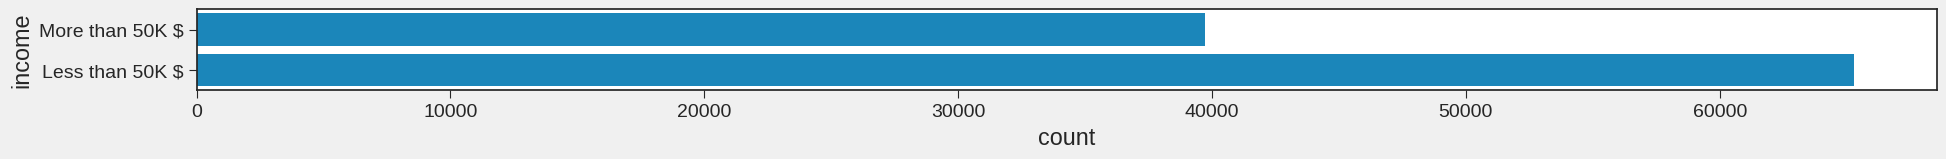

In [ ]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=data_train)

Education:

In [ ]:
categorical_var = list(data_train.select_dtypes(include=object).columns)
numerical_var = list(data_train.select_dtypes(exclude=object).columns)

Text(0.5, 0, '\n Education Level')

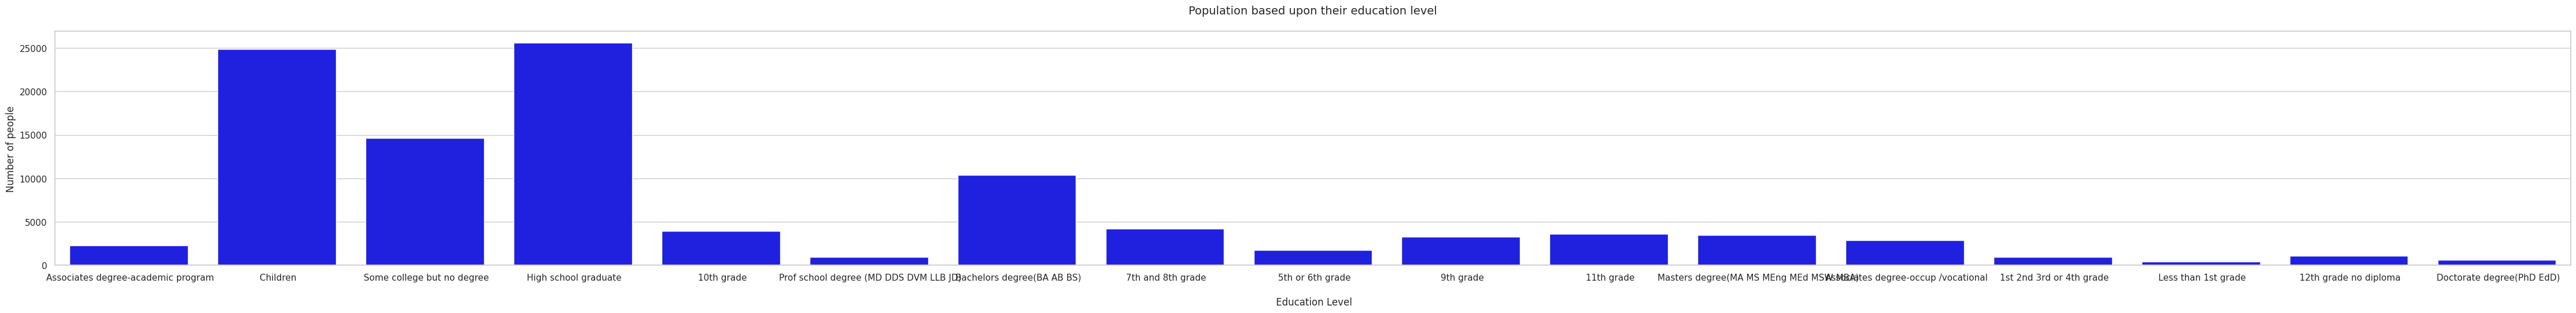

In [ ]:
plt.figure(figsize=(50,5))
sns.set(style = 'whitegrid')
sns.countplot(x="educ", data=data_train,color='blue')
plt.title("Population based upon their education level\n",size=14)
plt.ylabel("Number of people")
plt.xlabel("\n Education Level")

<Axes: xlabel='educ', ylabel='count'>

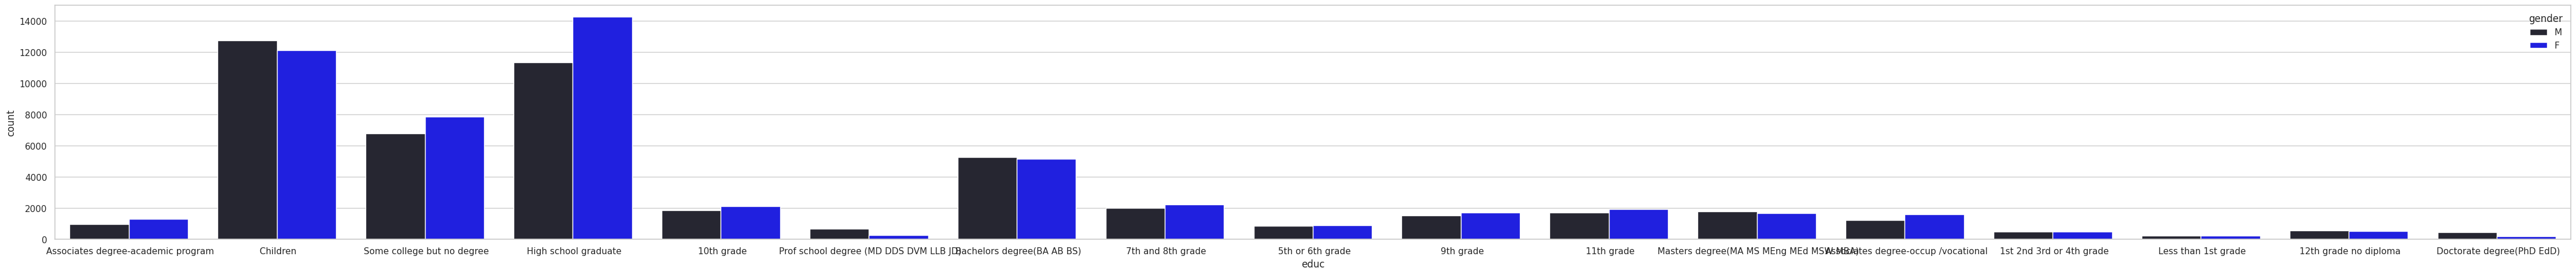

In [ ]:
plt.figure(figsize=(50,5))
sns.countplot(x="educ",data=data_train,hue="gender",color="blue") # Changed "educ" to x = "educ"

Marriage Status:

<Axes: xlabel='marriage_status', ylabel='count'>

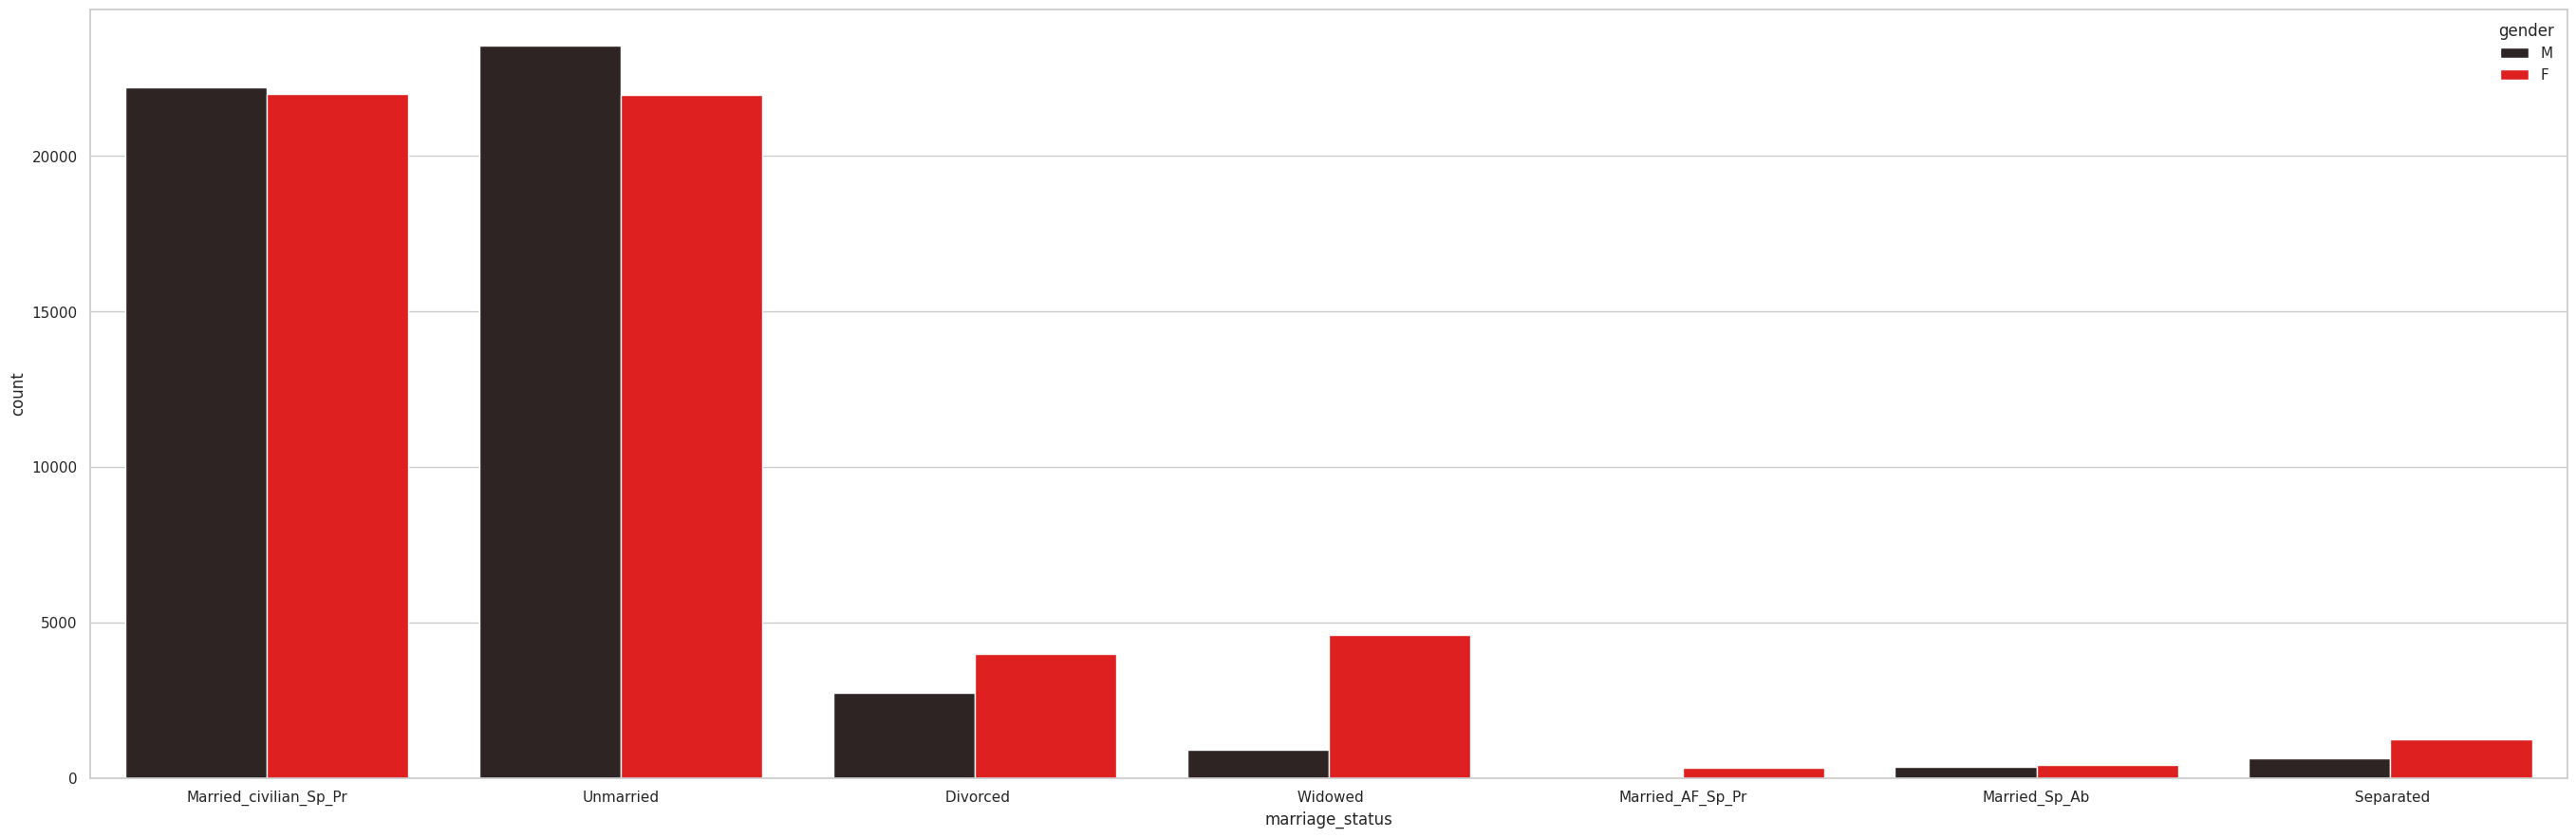

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="marriage_status",data=data_train,hue="gender",color="red")

Income:

<Axes: xlabel='income', ylabel='count'>

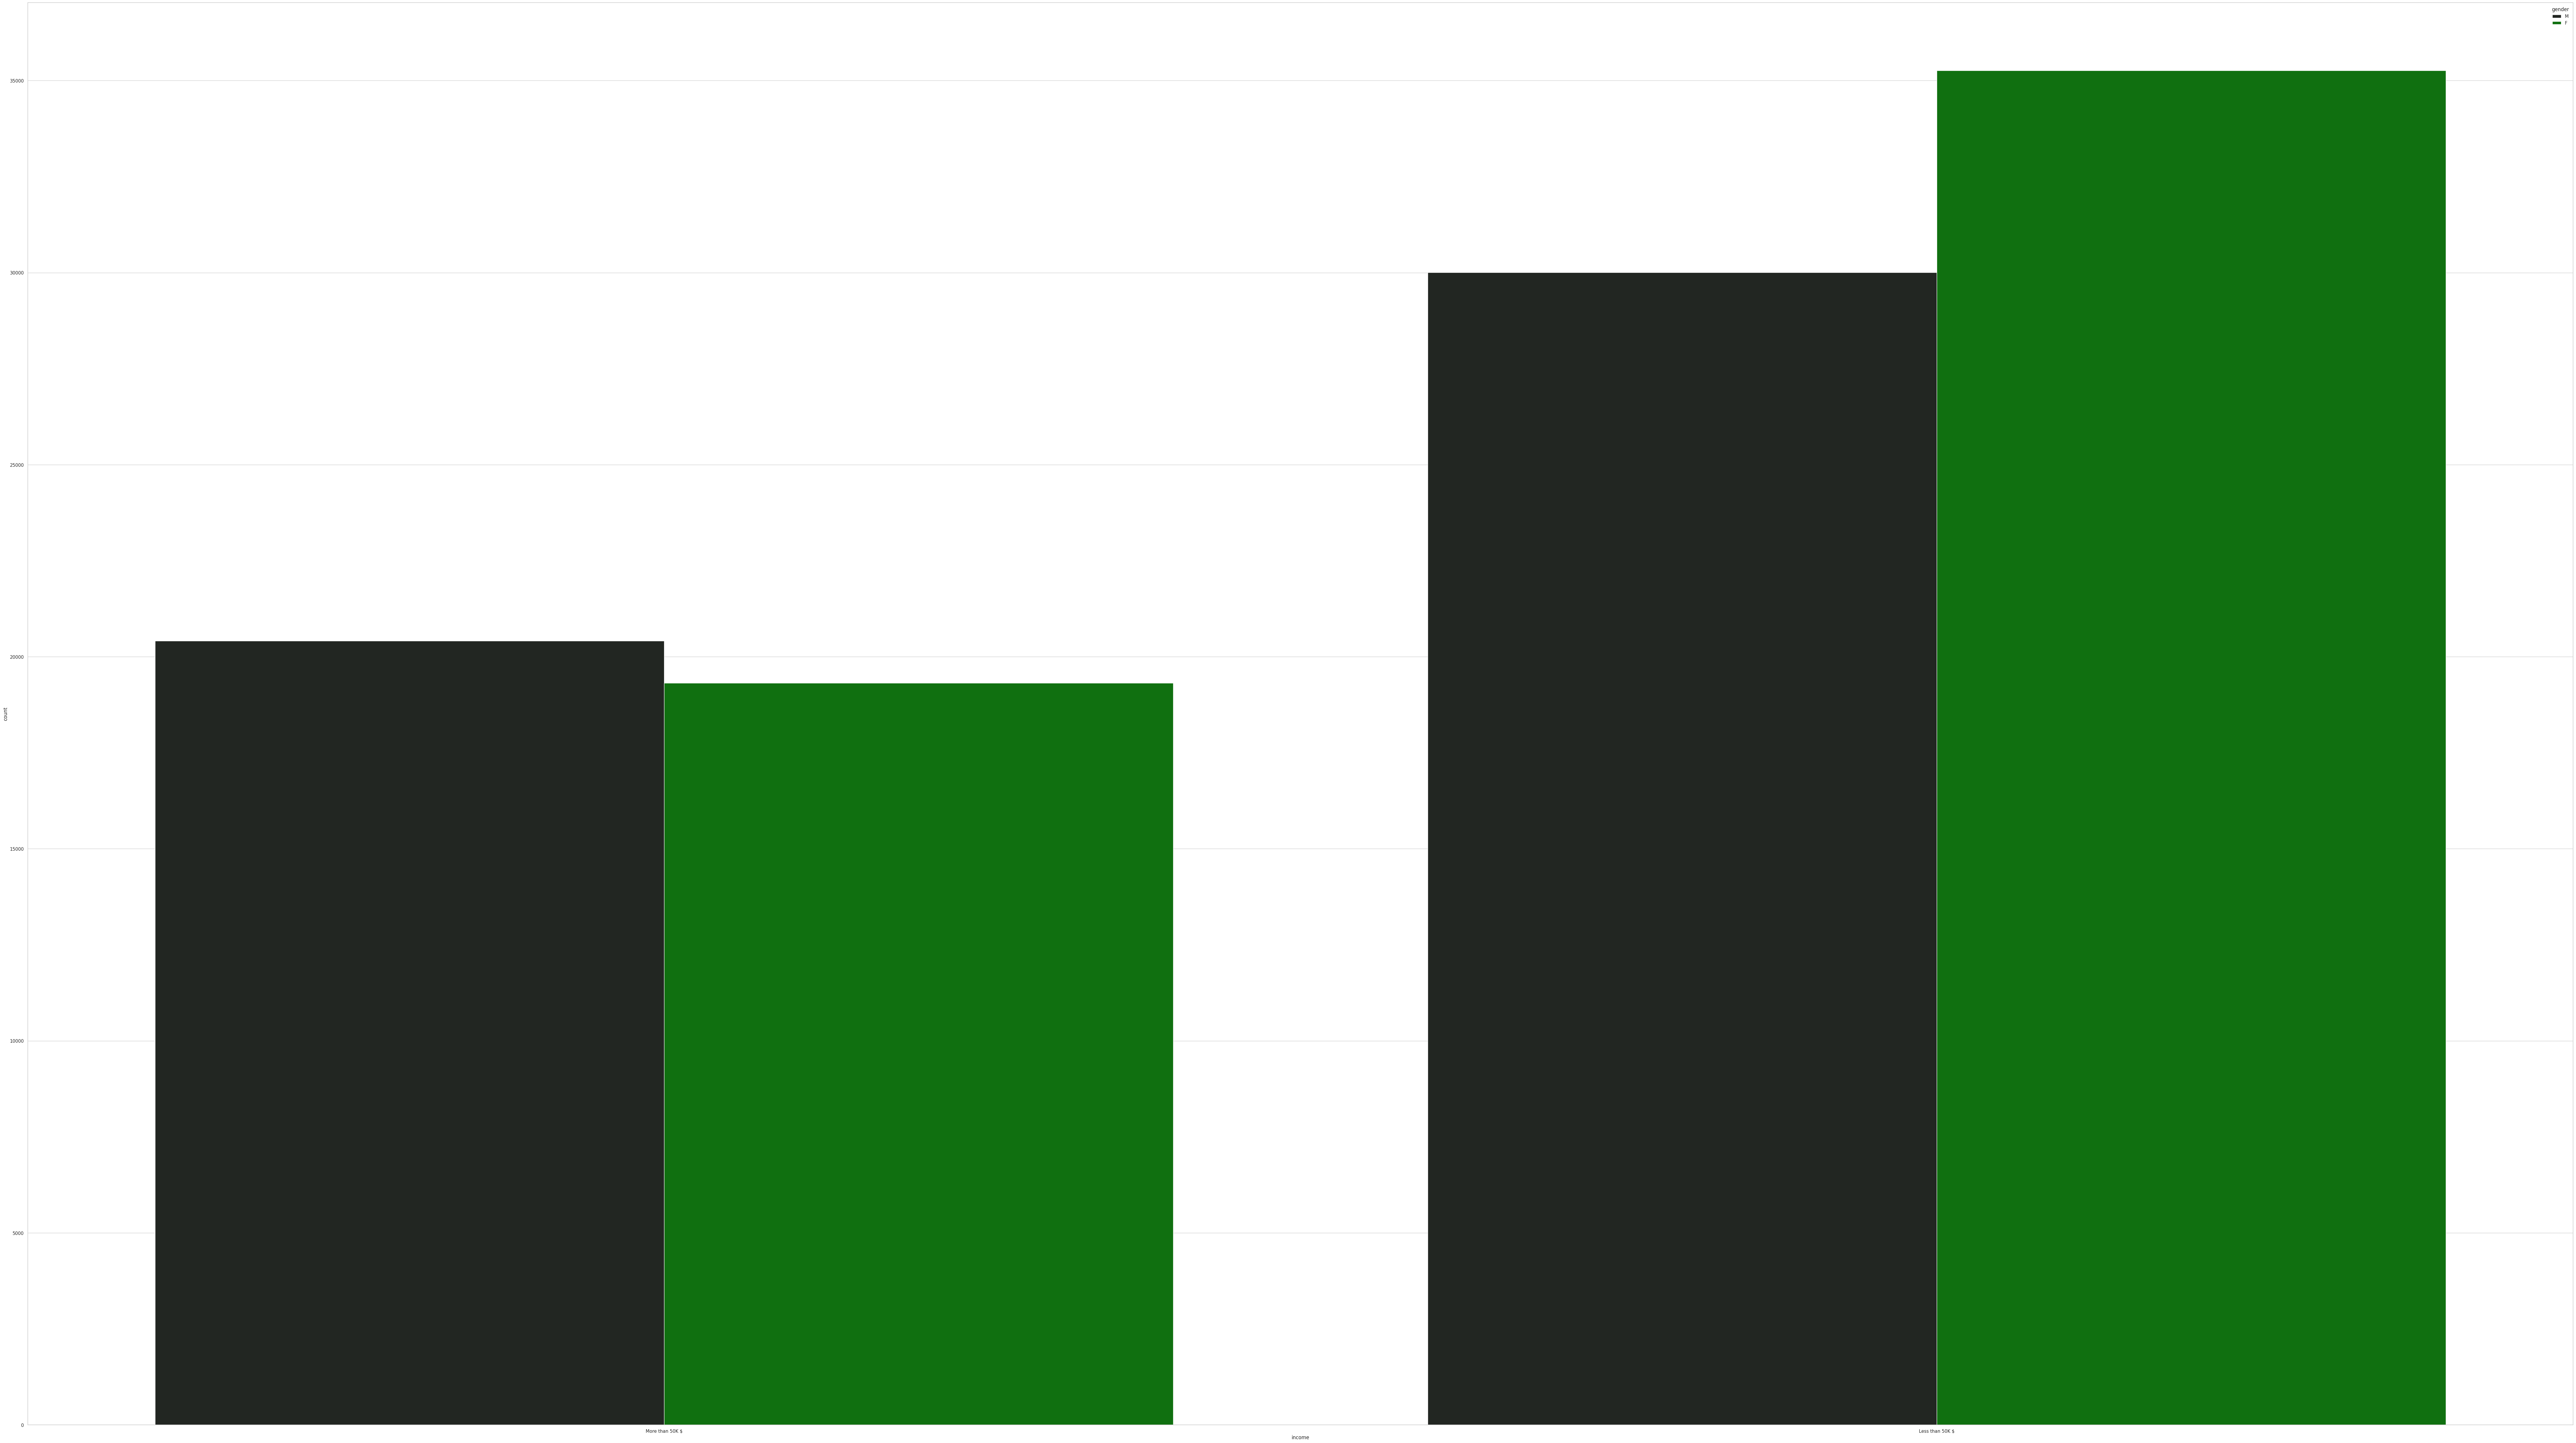

In [ ]:
plt.figure(figsize=(100,60))
sns.countplot(x='income',data=data_train,hue="gender",color="green")

For instance black is male and green is female. We can see that the income of male is greater than female workers.

Race:

<Axes: xlabel='race', ylabel='prop'>

<Figure size 10000x500 with 0 Axes>

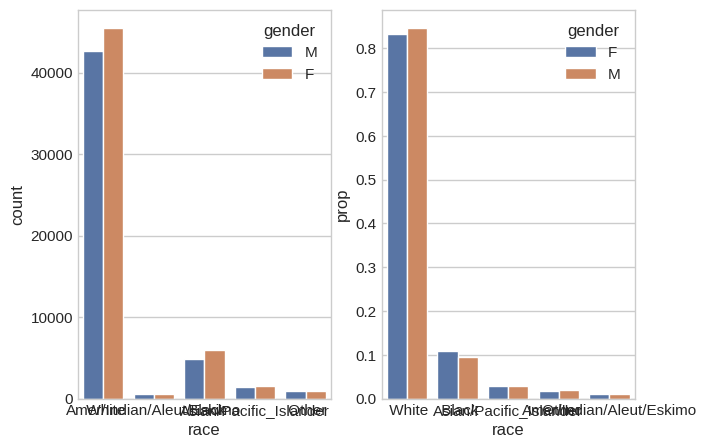

In [ ]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"

plt.figure(figsize=(100,5))
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=data_train, ax=axes[0]) # Changed my_df to data_train

prop_df = (data_train[x]
           .groupby(data_train[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

Hourly Wage:

In [ ]:
# Check the data type of the 'hourly_wage' column
print(data_train['hourly_wage'].dtype)

# Attempt to convert the column to numeric, handling errors by setting them to NaN
data_train['hourly_wage'] = pd.to_numeric(data_train['hourly_wage'], errors='coerce')

# Check for NaN values after conversion to identify problematic rows
nan_count = data_train['hourly_wage'].isnull().sum()
print(f'Number of NaN values after conversion: {nan_count}')

# If there are NaN values, inspect the original data for non-numeric characters
if nan_count > 0:
    problematic_rows = data_train[data_train['hourly_wage'].isnull()]
    # Print only the first 5 problematic rows for inspection
    print(problematic_rows.head())
    # Further investigation and cleaning might be needed based on the problematic values.

# Now you should be able to bin the data
# Check if there are any valid numeric values before attempting to bin
if data_train['hourly_wage'].notna().any():
    data_train['hourly_wage_bin'] = pd.cut(data_train['hourly_wage'], 10)
else:
    print("Warning: Cannot bin data as there are no valid numeric values in 'hourly_wage' after conversion.")

# The second line in your original code seems redundant, you can remove it
# data_train['hourly_wage'] = data_train['hourly_wage']

float64
Number of NaN values after conversion: 0


This code first checks if there are any non-NaN values in the hourly_wage column after the conversion. If there are, it proceeds with the binning using pd.cut.

(20.0, 60.0)

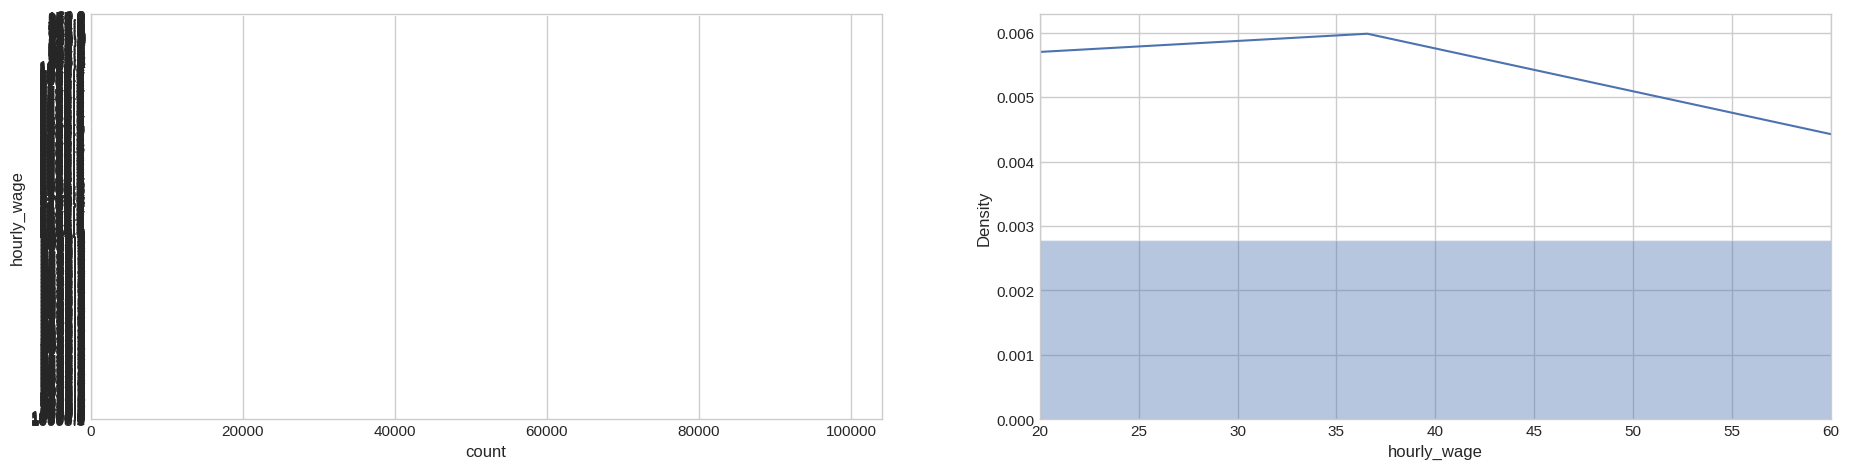

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

# Check if 'hourly_wage_bin' exists in data_train
if 'hourly_wage' in data_train.columns:
    sns.countplot(y="hourly_wage", data=data_train);
else:
    print("Error: 'hourly_wage_bin' not found in data_train. Please check previous steps.")

plt.subplot(1, 2, 2)
sns.distplot(data_train['hourly_wage']);
sns.distplot(data_train[data_train['income'] == '>50K']['hourly_wage'], kde_kws={"label": ">$50K"})
sns.distplot(data_train[data_train['income'] == '<=50K']['hourly_wage'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

Age:

<Axes: xlabel='age'>

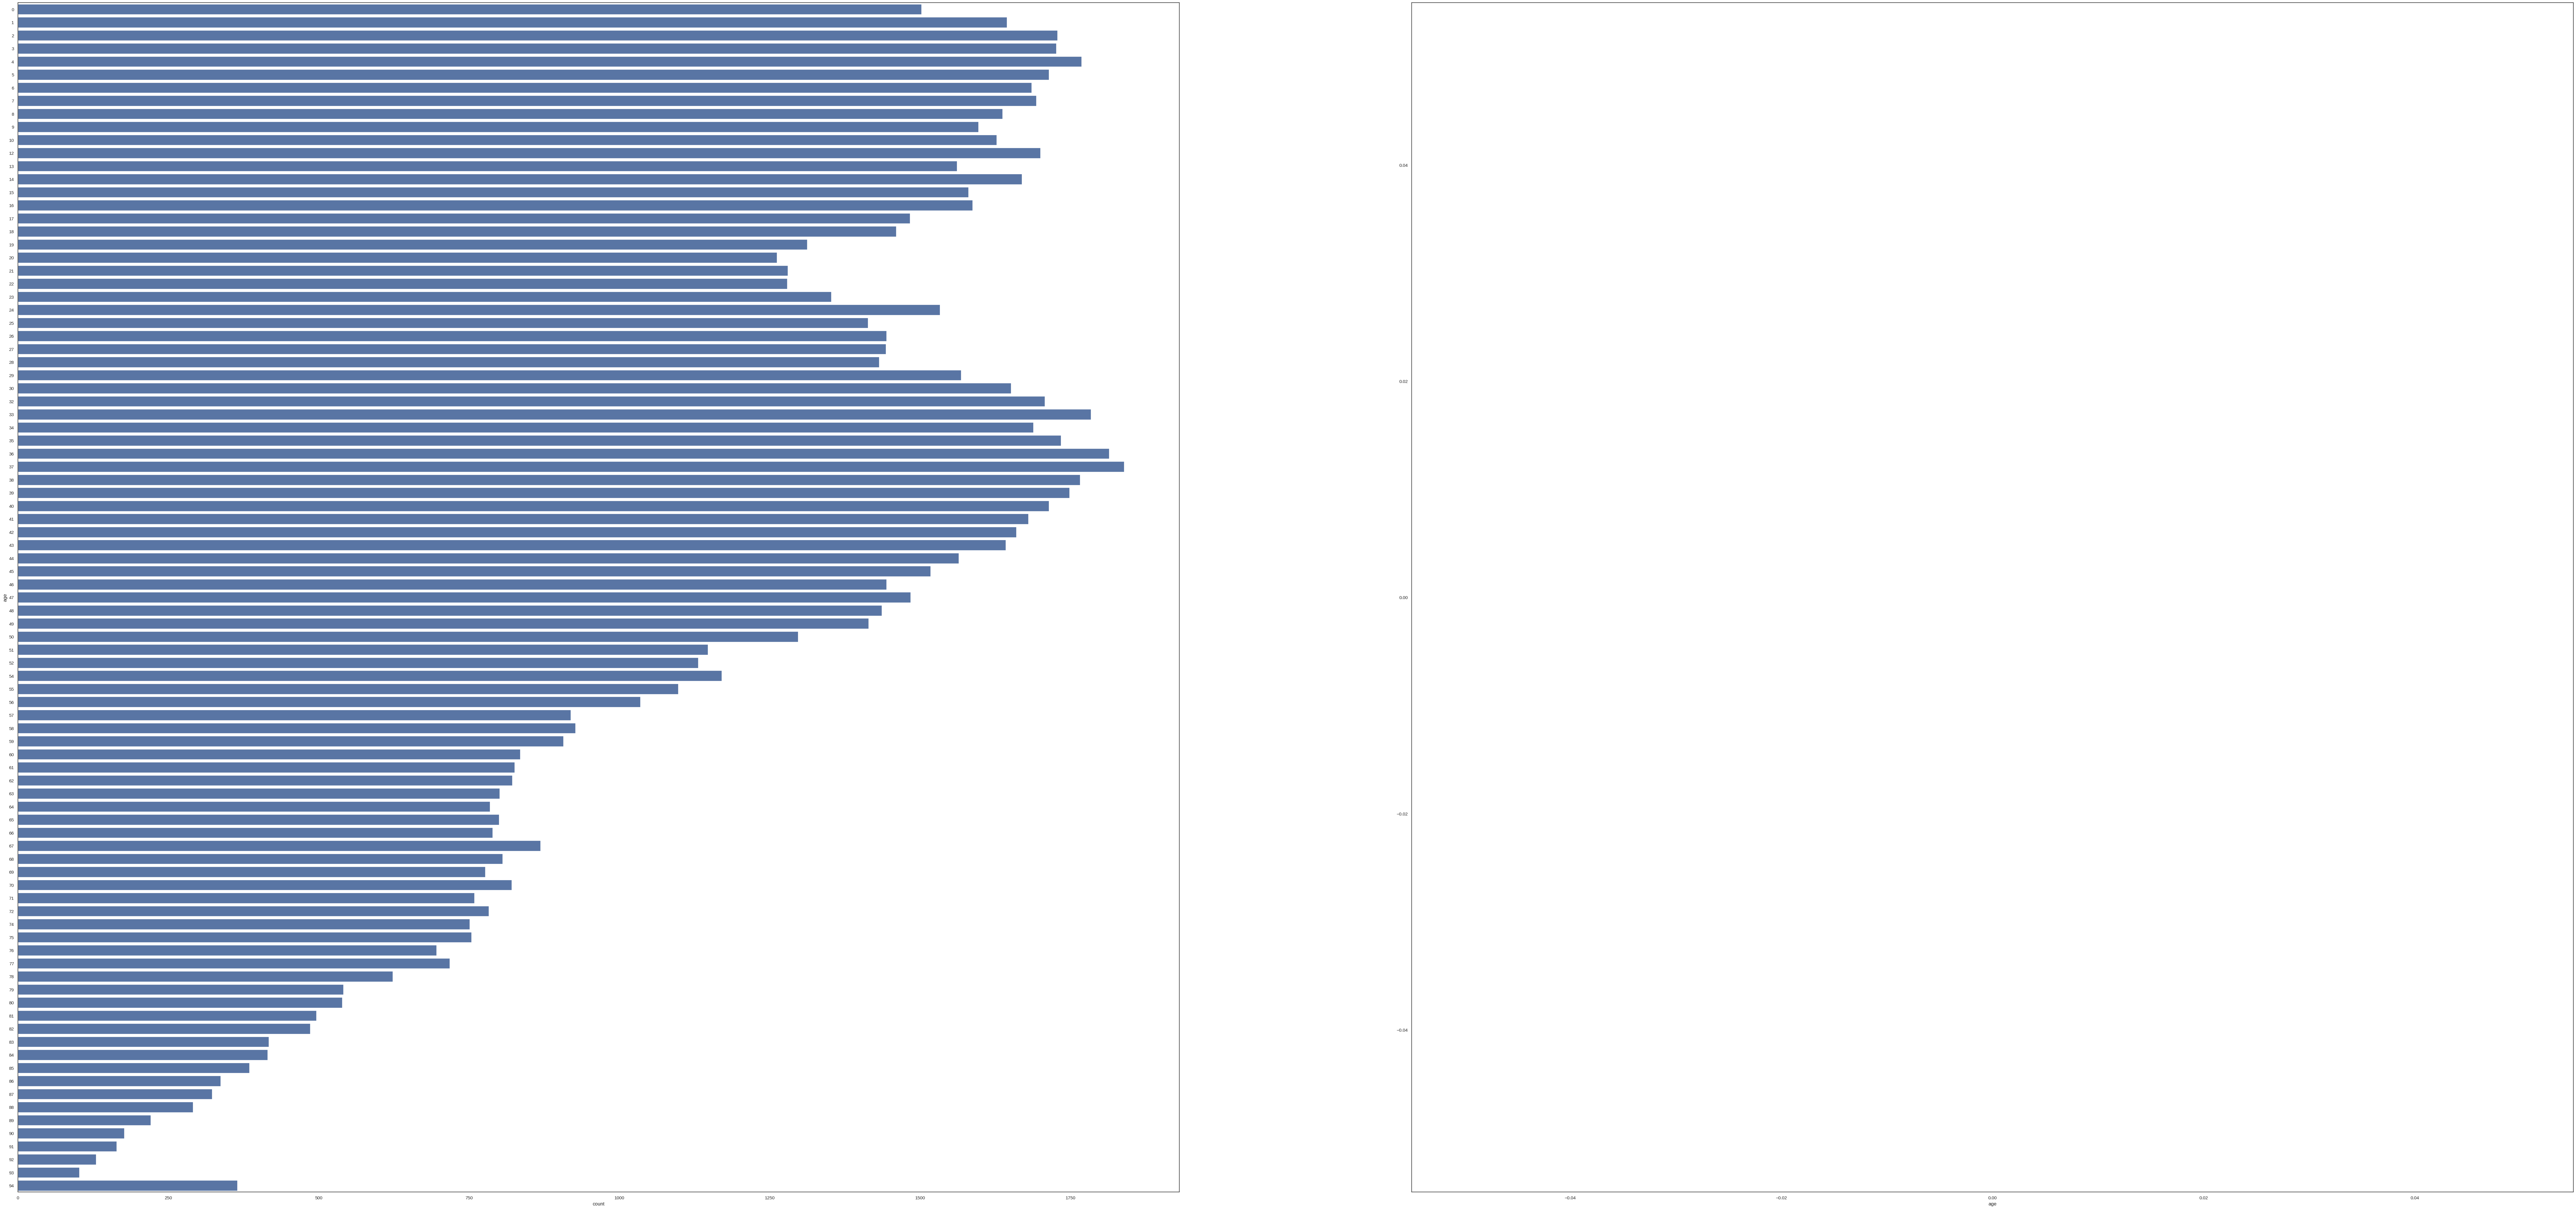

In [ ]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(100,50))
plt.subplot(1, 2, 1)
sns.countplot(y="age", data=data_train)
plt.subplot(1, 2, 2)
sns.distplot(data_train[data_train['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(data_train[data_train['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

The code is trying to plot a countplot using the under_18 column, but it doesn't exist in the provided data.

Text(0.5, 1.0, 'Age Histogram')

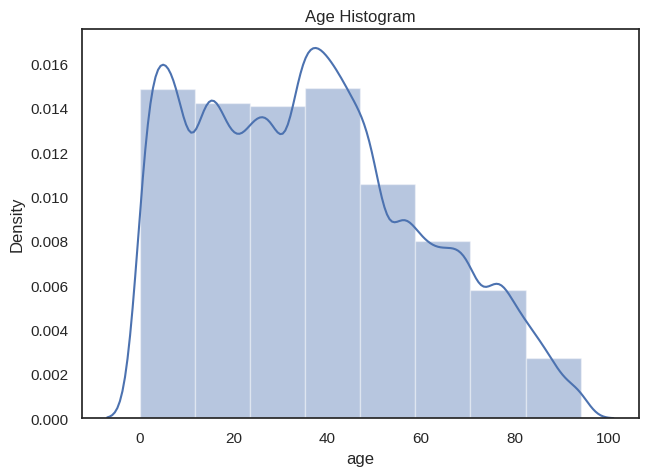

In [ ]:
sns.distplot(data_train['age'],bins=8)
plt.title("Age Histogram")

The Age Histogram shows the distribution of ages in the dataset.

**Most Frequent Age Range:** The histogram has a peak around the 30-40 age range, suggesting this is the most common age group in the dataset.

**Distribution:** The distribution is slightly right-skewed, meaning there are more people in the younger age ranges compared to the older ones.

**Range:** The age range in the data spans from approximately 17 to 90 years old.

**Outliers:** While most ages fall within a certain range, there are a few potential outliers in the higher age groups.

EDA:

Pairplot:

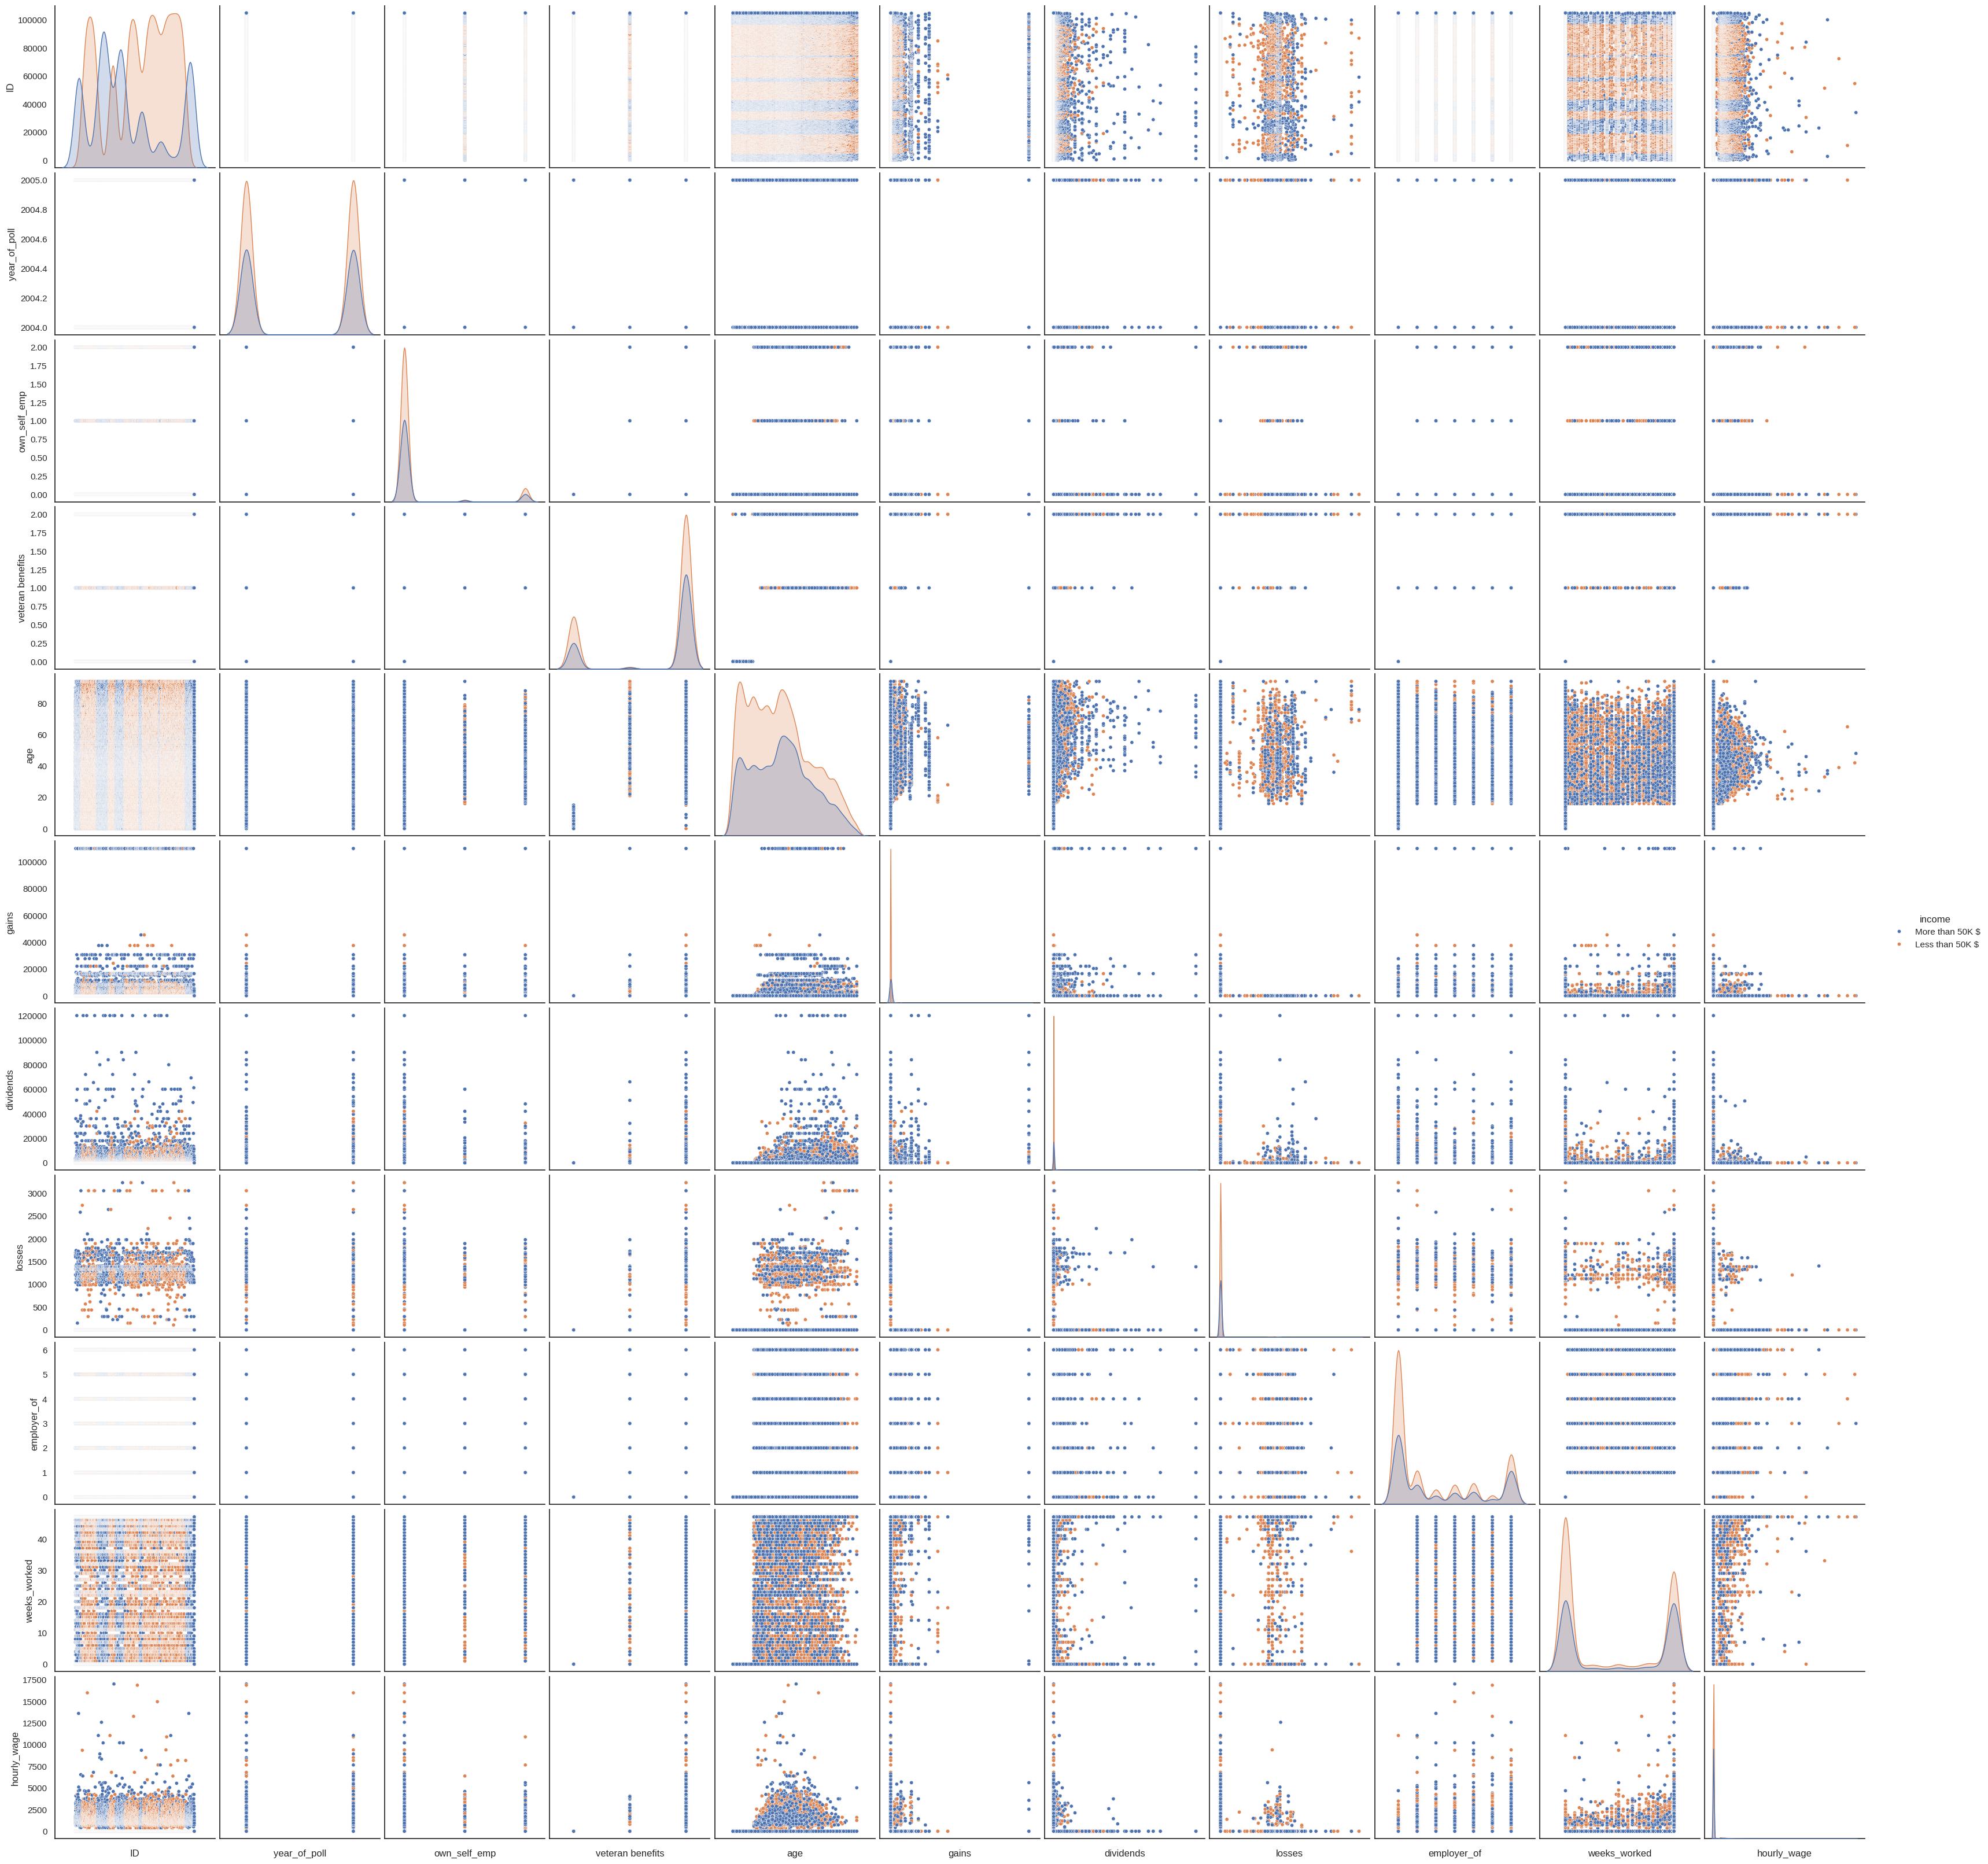

In [ ]:
pp = sns.pairplot(data_train, hue = 'income', palette = 'deep',
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

Correlation heatmap:

In [ ]:
!pip install pandas
import pandas as pd

def correlation_heatmap(data_train):
    # Convert 'object' columns to numeric if they should represent numbers
    for col in data_train.columns:
        if data_train[col].dtype == 'object':
            try:
                data_train[col] = pd.to_numeric(data_train[col].str.strip(), errors='coerce') # Try to convert to numeric after stripping whitespace. Set invalid values to NaN.
            except:
                pass
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        data_train.corr(),
        cmap = "YlGn",
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)


In [ ]:
print(correlation_heatmap)

<function correlation_heatmap at 0x7d21e7f239a0>


Bivariate Analysis:

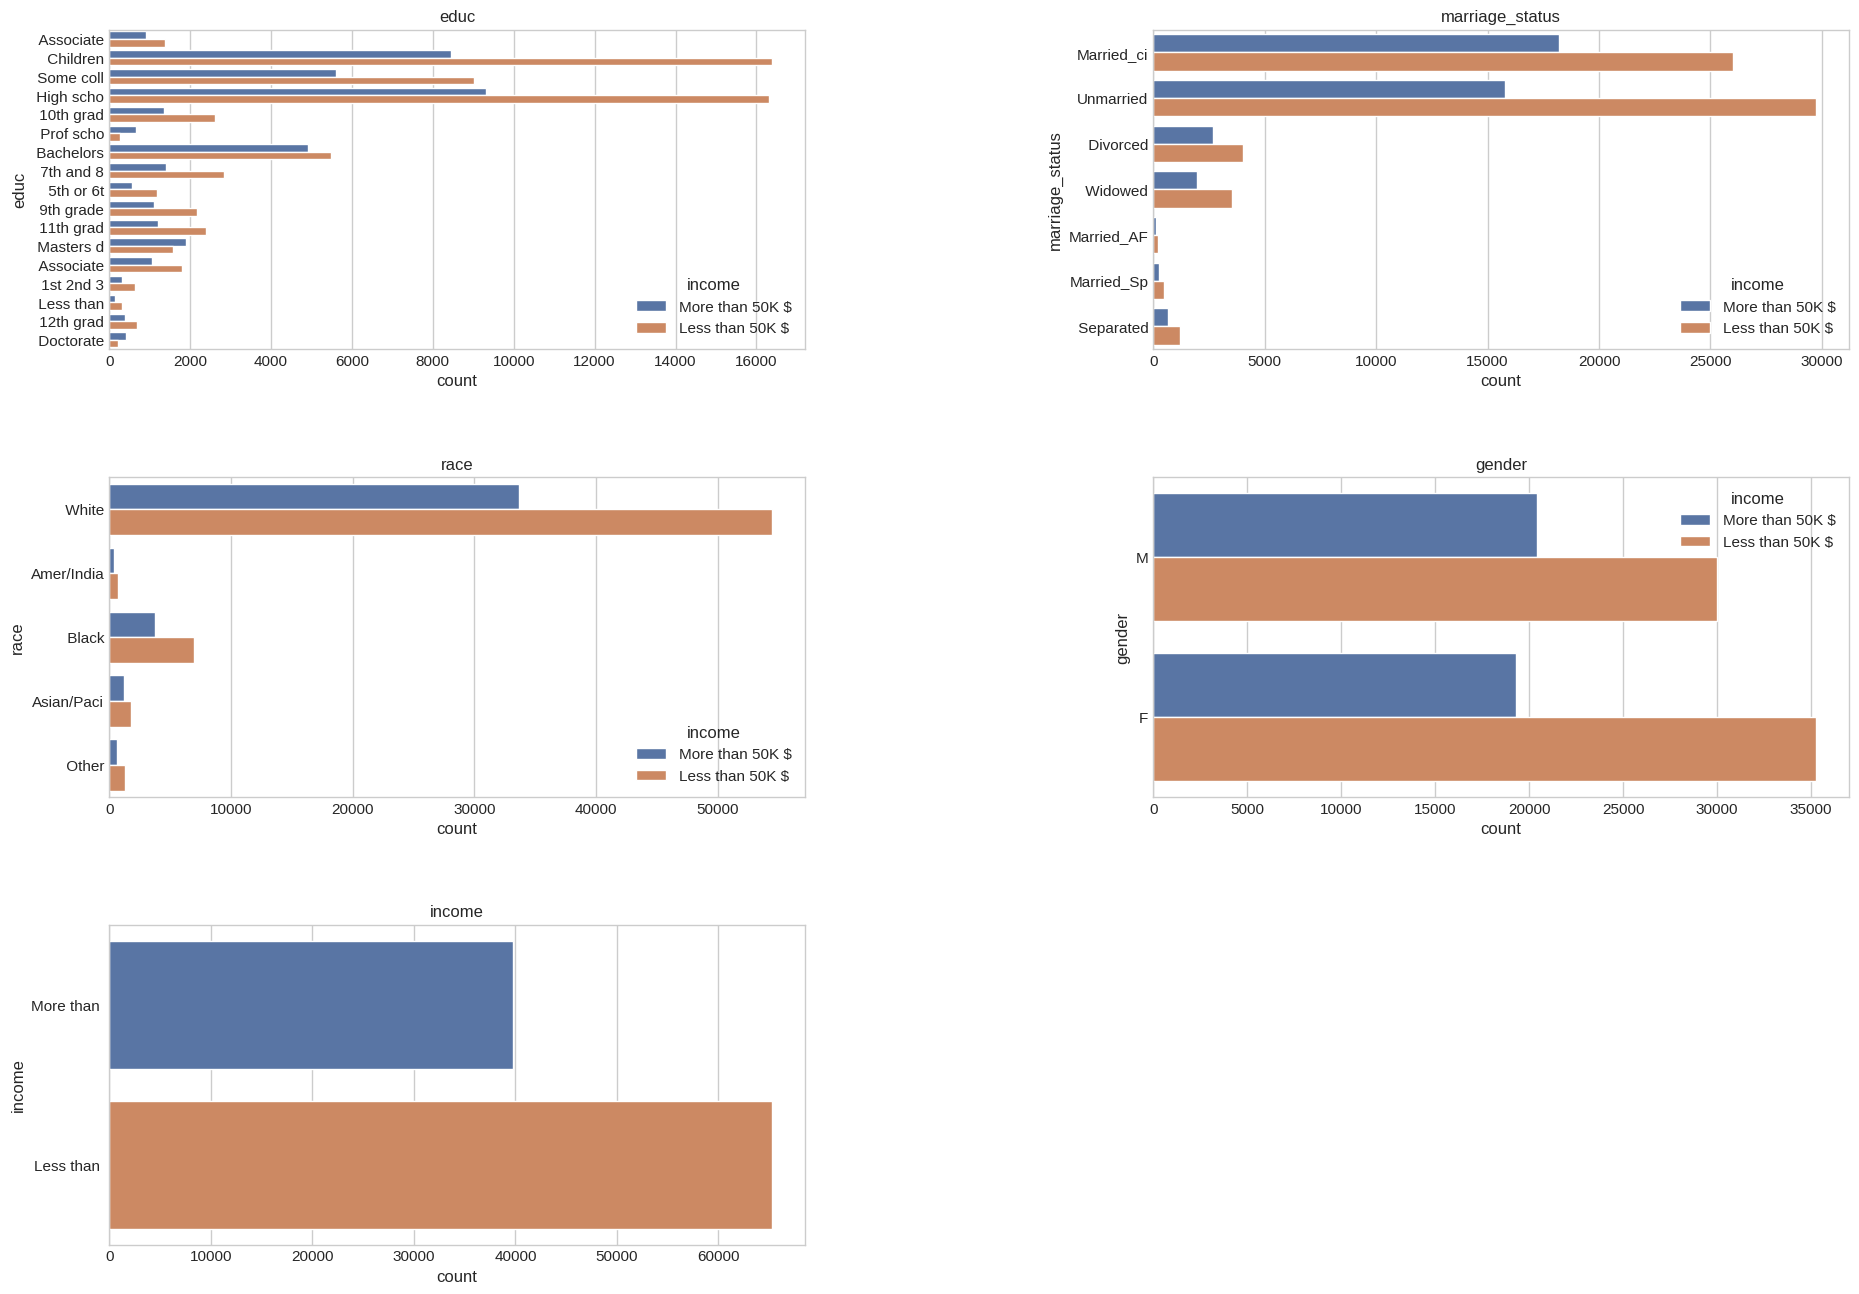

In [ ]:
import math

def plot_bivariate_bar(data_train, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = data_train.select_dtypes(include=[object]) # Use object instead of np.object
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object: # Use object instead of np.object
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)

bivariate_df = data_train.loc[:, ['educ',
           'marriage_status', 'race', 'gender','income']]

plot_bivariate_bar(bivariate_df, hue='income', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

In [ ]:
print(plot_bivariate_bar)

<function plot_bivariate_bar at 0x7d21e51d3c70>


Occupation vs Income level:

<Axes: xlabel='major_ind_code', ylabel='age'>

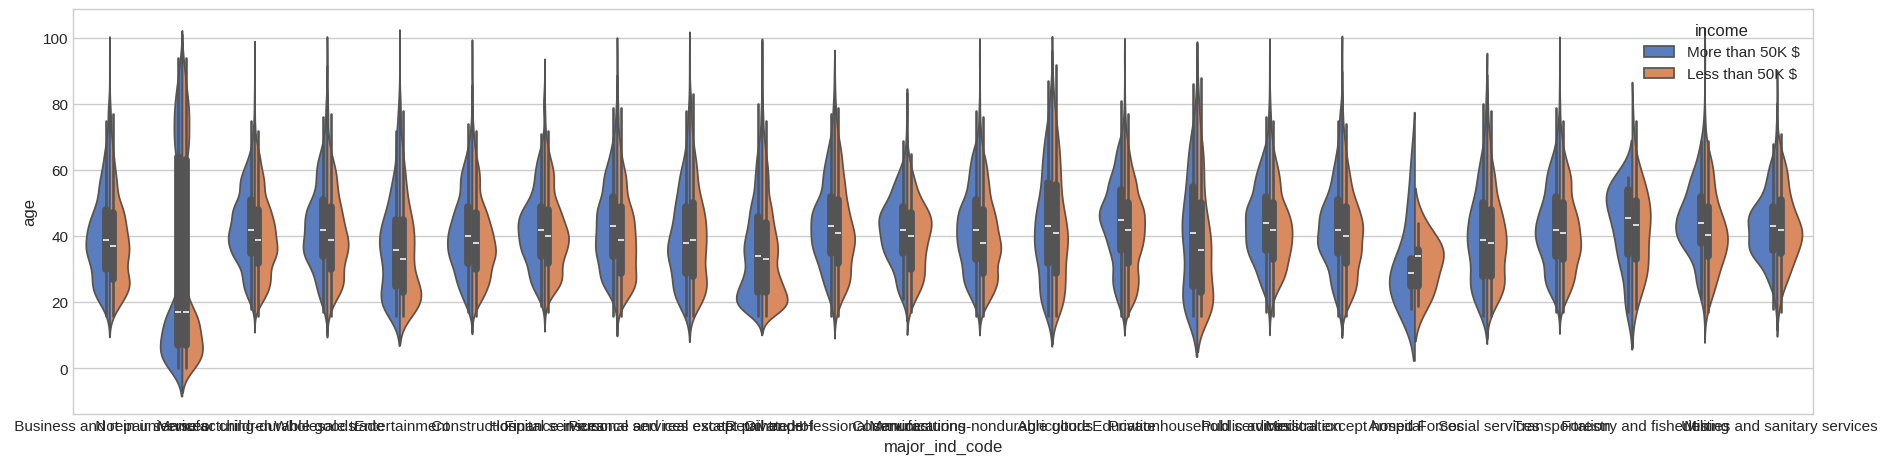

In [ ]:
from matplotlib import pyplot
%matplotlib inline
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="major_ind_code", y="age", hue="income",
                    data=data_train, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [ ]:
data_train['major_ind_code'] = pd.Categorical(data_train['major_ind_code'])
data_train['income'] = pd.Categorical(data_train['income'])
print(data_train[['major_ind_code', 'age', 'income']].isnull().sum())

major_ind_code    0
age               0
income            0
dtype: int64


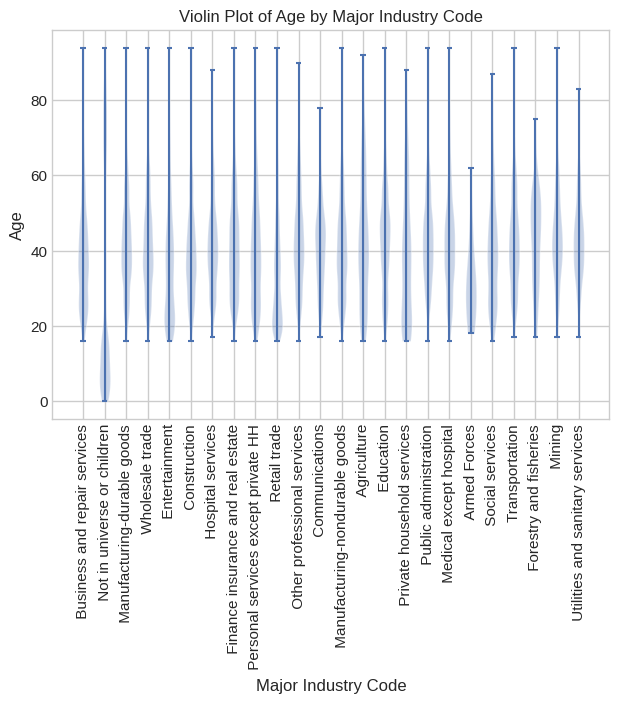

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'major_ind_code' is treated as a string for filtering
# and handle NaN values appropriately
data_train['major_ind_code'] = data_train['major_ind_code'].astype(str).replace('nan', np.nan)

# Get unique major industry codes, excluding NaN values
major_ind_codes = data_train['major_ind_code'].dropna().unique()

# Get age data for each valid major industry code, handling potential empty groups
age_data = [data_train[data_train['major_ind_code'] == code]['age'].values for code in major_ind_codes]
age_data = [data for data in age_data if len(data) > 0]  # Remove empty groups
major_ind_codes = [code for i, code in enumerate(major_ind_codes) if len(age_data[i]) > 0] #Remove corresponding codes for empty groups

# Plot the violin plot, only if age_data is not empty
if age_data:
    plt.violinplot(age_data, positions=range(len(major_ind_codes)))
    plt.xticks(range(len(major_ind_codes)), major_ind_codes, rotation=90)
    plt.xlabel('Major Industry Code')
    plt.ylabel('Age')
    plt.title('Violin Plot of Age by Major Industry Code')
    plt.show()
else:
    print("No valid data to plot.")

We tried different approach to make the graph availabe. We also converted the data.

**Handling NaN values:** The code now explicitly replaces 'nan' values with np.nan to ensure they are handled correctly.

**Filtering empty groups:** The code now filters out empty age data lists to prevent the violinplot function from encountering empty arrays. It checks for empty lists and removes corresponding items from age_data and major_ind_codes.

**Avoiding errors with empty age_data:**
The code is updated to check if age_data is empty before attempting to create a plot. If it is empty, it prints a message to the user instead of throwing an error. This prevents the ValueError when no valid data is available.

Race vs Income:

<Axes: xlabel='race', ylabel='age'>

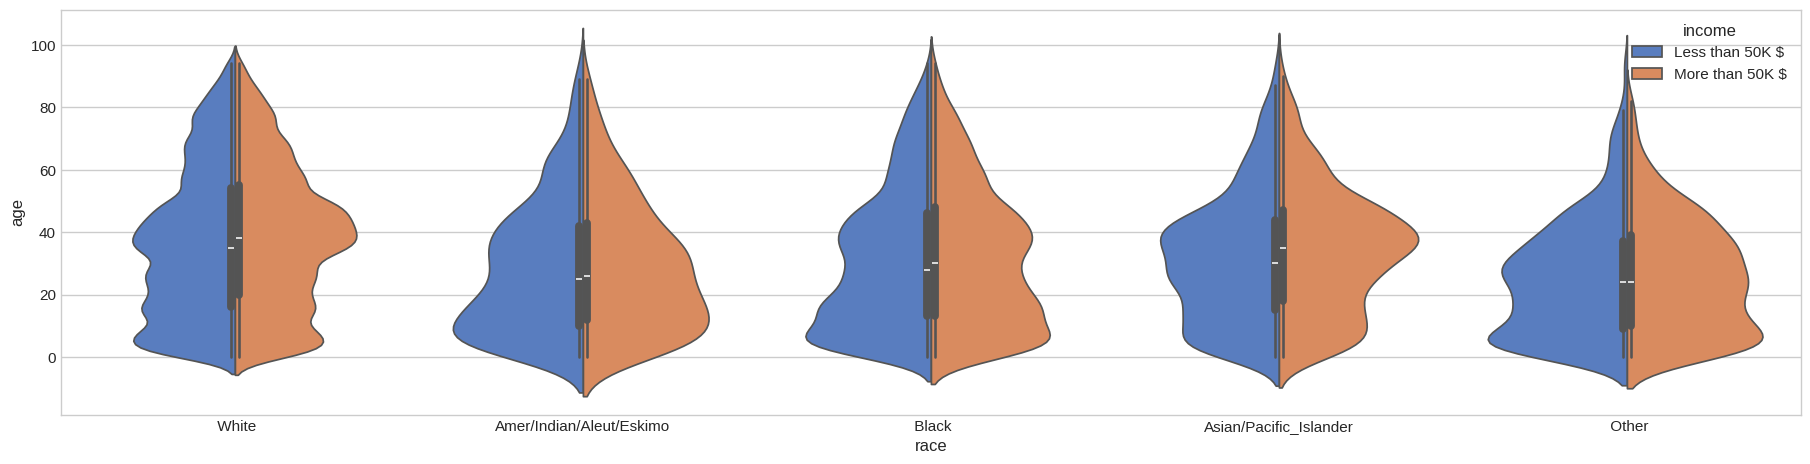

In [ ]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income",
                    data=data_train, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Machine Learning models:

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Feature Encoding:

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data_train = data_train.apply(LabelEncoder().fit_transform)
data_train.head()

ID  year_of_poll  own_self_emp  veteran benefits  race  father_country  \
0   0             0             0                 2     2              40   
1   1             1             0                 0     2              24   
2   2             0             0                 2     2              40   
3   3             0             0                 2     3              40   
4   4             0             0                 2     2              40   

   educ  house_stat  major_ind_code  self_country  age  mother_country  \
0     7          20               2            40   40              40   
1    10           8              14            40   10              40   
2    16          33              10            40   44              40   
3    12          20              23            40   33              40   
4    12          20              23            40   58              40   

   house_summary  gender  hisp_origin  gains  dividends  marriage_status  \
0              0       1            4      0          0                5   
1              3       1            6      0          0                6   
2              4       1            4      0          0                0   
3              0       1            4      0          0                5   
4              0       0            4      0          0                0   

   losses  employer_of  weeks_worked  hourly_wage  citizenship  fed_liability  \
0       0            1            47            0            3              4   
1       0            0             0            0            3              1   
2       0            6            47            0            3              2   
3       0            2            47            0            3              4   
4       0            3            47            0            3              2   

   income  hourly_wage_bin  
0       1                0  
1       1                0  
2       1                0  
3       1                0  
4       1                0

In [ ]:
drop_elements = ['educ', 'self_country', 'income', 'age', 'hourly_wage']
y = data_train["income"]
X = data_train.drop(drop_elements, axis=1)
X.head()

ID  year_of_poll  own_self_emp  veteran benefits  race  father_country  \
0   0             0             0                 2     2              40   
1   1             1             0                 0     2              24   
2   2             0             0                 2     2              40   
3   3             0             0                 2     3              40   
4   4             0             0                 2     2              40   

   house_stat  major_ind_code  mother_country  house_summary  gender  \
0          20               2              40              0       1   
1           8              14              40              3       1   
2          33              10              40              4       1   
3          20              23              40              0       1   
4          20              23              40              0       0   

   hisp_origin  gains  dividends  marriage_status  losses  employer_of  \
0            4      0          0                5       0            1   
1            6      0          0                6       0            0   
2            4      0          0                0       0            6   
3            4      0          0                5       0            2   
4            4      0          0                0       0            3   

   weeks_worked  citizenship  fed_liability  hourly_wage_bin  
0            47            3              4                0  
1             0            3              1                0  
2            47            3              2                0  
3            47            3              4                0  
4            47            3              2                0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Principal Component Analysis (PCA):

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

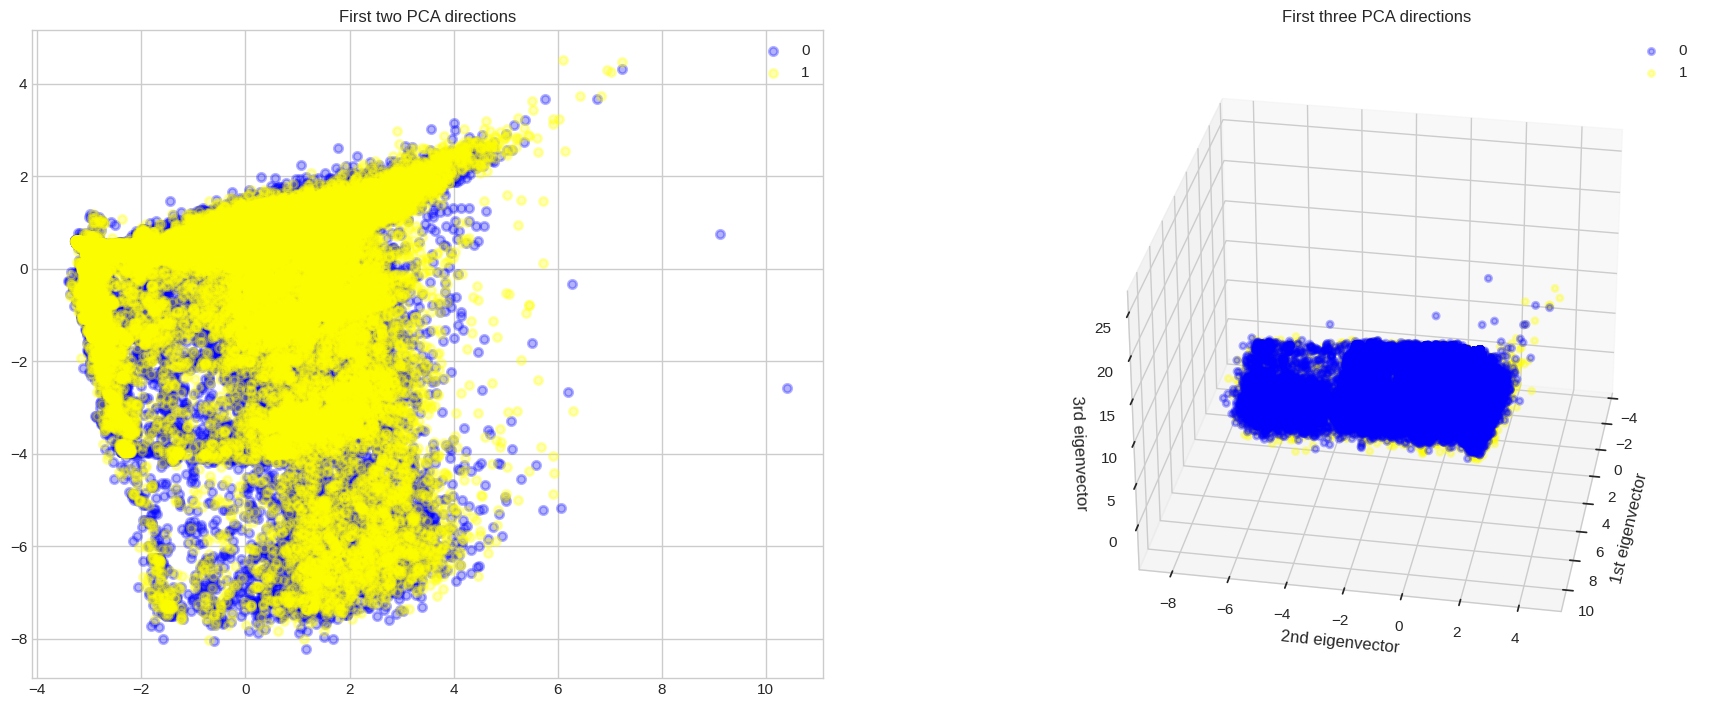

In [ ]:
std_scale = preprocessing.StandardScaler().fit(data_train.drop('income', axis=1))
X = std_scale.transform(data_train.drop('income', axis=1))
y = data_train['income']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
                color=color,
                alpha=alpha,
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
               color=color,
               alpha=alpha,
               lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

We also added scatterplot to it as to visualize the data in the reduced dimension and its positioning is determined by the principal component analysis.

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.15556352, 0.27073732, 0.35629331, 0.41561463, 0.47099505,
       0.51972974, 0.56742186, 0.6149297 , 0.66203236, 0.70805929,
       0.75277034, 0.79559657, 0.83692276, 0.87476526, 0.90848416,
       0.93307968, 0.95553437, 0.9705434 , 0.98140134, 0.99191301,
       1.        ])

The 2-component PCA graph shows the data projected onto the first two principal components. Here's what we can observe:

**Clusters:** There might be some clustering present in the data, although the clusters might be overlapping to some extent. Points belonging to different classes (represented by different colors) tend to occupy different regions of the graph, suggesting some level of separation between the classes.
Variance: The first two principal components capture the maximum variance in the data. The spread of points along each axis indicates the amount of variance captured by that component.

**Interpretation:** The axes represent the principal components, which are linear combinations of the original features. It's often challenging to interpret the meaning of these components directly; however, they represent directions of maximum variance in the data.

**Analysis of the 3-Component PCA Graph:**

The 3-component PCA graph adds another dimension to the visualization, allowing for a more comprehensive view of the data.
Enhanced Visualization: This 3D plot might reveal additional clusters or patterns that weren't apparent in the 2D plot. It can help you better understand the relationships between the data points and their classes.
Variance: The three principal components capture an even larger portion of the total variance in the data.

**Interpretation:** Similar to the 2D graph, interpreting the principal components might still be challenging. However, by rotating the plot and observing it from different angles, you might be able to gain further insights into the underlying structure of the data.

**Overall Insights:**

The PCA graphs generally show some level of separation between different classes in your data. The presence of potential clusters could indicate that the selected features are informative for distinguishing between these classes. However, there is also some overlap between the clusters, implying that there is some ambiguity in certain regions of the feature space. This suggests that PCA might not be able to achieve perfect separation between all the classes, potentially due to inherent data complexity or the limitations of linear dimensionality reduction techniques.


Classification model:

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.37976190476190474

In [ ]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.5331238095238096

Gaussian Naive Bayes:

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.6269047619047619


Linear Support Vector Machine:

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.6356666666666667


Radical Support Vector Machine:

In [ ]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.6356666666666667


Logistic Regression:

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.6290476190476191


Random Forest:

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.9554761904761905


K-Nearest Neighbour:

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.9579047619047619


Cross Validation:

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
# Set shuffle=True in KFold
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
models_dataframe